In [8]:
import pandas as pd
import tqdm
from Bio import SeqIO
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# import keras functions
# import tensorflow
from tensorflow.keras.layers import Conv1D, Dense, MaxPooling1D, Input, Flatten, LSTM, Dropout, Bidirectional, LeakyReLU
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.callbacks import EarlyStopping

# performance matrices
from sklearn.metrics import confusion_matrix, matthews_corrcoef, accuracy_score

# plots
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(123)


import tensorflow as tf
tf.random.set_seed(123)


from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape, Lambda
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint
import numpy as np
from Bio import SeqIO
from numpy import array
from numpy import argmax
from sklearn.model_selection import train_test_split
from keras.layers.embeddings import Embedding
from keras import backend as K
from keras.backend import expand_dims
import matplotlib.pyplot as plt
from keras.regularizers import l1, l2


from keras.models import Model
from keras.layers import Concatenate, Dense, LSTM, Input, concatenate


from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

In [1]:
def plot(history):
    # learning curves of model accuracy
    plt.plot(history.history['accuracy'], label='train_acc')
    plt.plot(history.history['val_accuracy'], label='val_acc')
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.legend()
    plt.show()

In [10]:
train_positive_pt5 = pd.read_csv("features/full/train_positive_ProtT5-XL-UniRef50.csv", header = None).iloc[:,2:]
train_negative_pt5 = pd.read_csv("features/full/train_negative_ProtT5-XL-UniRef50.csv", header = None).iloc[:,2:]
test_positive_pt5 = pd.read_csv("features/full/test_positive_ProtT5-XL-UniRef50.csv", header = None).iloc[:,2:]
test_negative_pt5 = pd.read_csv("features/full/test_negative_ProtT5-XL-UniRef50.csv", header = None).iloc[:,2:]


# create labels
train_positive_labels = np.ones(train_positive_pt5.shape[0])
train_negative_labels = np.zeros(train_negative_pt5.shape[0])
test_positive_labels = np.ones(test_positive_pt5.shape[0])
test_negative_labels = np.zeros(test_negative_pt5.shape[0])

# stack positive and negative data together
X_train_pt5 = np.vstack((train_positive_pt5,train_negative_pt5))
X_test_pt5 = np.vstack((test_positive_pt5,test_negative_pt5))
y_train = np.concatenate((train_positive_labels, train_negative_labels), axis = 0)
y_test = np.concatenate((test_positive_labels, test_negative_labels), axis = 0)

# shuffle X and y together
X_train_pt5, y_train = shuffle(X_train_pt5, y_train)
X_test_pt5, y_test = shuffle(X_test_pt5, y_test)

# seperate validation data 

#X_train_embedding, X_val_embedding, y_train, y_val = train_test_split(X_train_embedding, y_train, test_size = 0.2, random_state = 47)


In [11]:
print(X_train_pt5.shape)
print(y_train.shape)
print(X_test_pt5.shape)
print(y_test.shape)

(9499, 1024)
(9499,)
(507, 1024)
(507,)


In [6]:
# model.summary()
# plot_model(model, show_shapes=True)

In [ ]:
pip install pykan 

from kan import *


In [ ]:
# create a KAN: 2D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
#model = KAN(width=[2,5,1], grid=5, k=3, seed=0)
# create dataset f(x,y) = exp(sin(pi*x)+y^2)
# create dataset f(x,y) = exp(sin(pi*x)+y^2)
#f = lambda x: torch.exp(torch.sin(torch.pi*x[:,[0]]) + x[:,[1]]**2)
#dataset = create_dataset(f, n_var=2)
#dataset['train_input'].shape, dataset['train_label'].shape
#(torch.Size([1000, 2]), torch.Size([1000, 1]))

In [36]:
def ANN():
    # prot_t5
    M1_input = Input(shape=(1024,))
    M1_dense_1 = Dense(256)(M1_input)
    drop_out = Dropout(0.4)(M1_dense_1)
   
    M1_dense_2 = Dense(128, activation='relu')(drop_out)
    drop_out = Dropout(0.4)(M1_dense_2)
    
#     M1_dense_2 = Dense(64, activation='relu')(drop_out)
#     leaky_relu = LeakyReLU(alpha=0.3)(M1_dense_2)
#     drop_out = Dropout(0.7)(leaky_relu)
    
    M1_dense_3 = Dense(1, activation = 'sigmoid')(drop_out)
    model = Model(inputs=M1_input, outputs=M1_dense_3)
    return model

In [18]:
def CNN_LSTM():
    model = Sequential()
    model.add(Input(shape=(1024,1)))
    model.add(Conv1D(filters=64,kernel_size=3,activation='relu',name='Conv_1D_1_add'))
    model.add(MaxPooling1D(pool_size=2,name="MaxPooling1D"))
    # model.add(Dropout(0.3))
    model.add(LSTM(64))
    model.add(Dropout(0.3))
    model.add(Flatten())
    model.add(Dense(8,activation='relu',name="Dense_1"))
    # model.add(Dropout(0.3))
    model.add(Dense(1,activation='sigmoid',name="Dense_2"))
    return model

In [31]:
def LSTM():
    model = Sequential()
    model.add(Input(shape=(1024,1)))
    model.add(LSTM())
    model.add(Dropout(0.3))
    model.add(Flatten())
    model.add(Dense(8,activation='relu',name="Dense_1"))
    model.add(Dense(1,activation='sigmoid',name="Dense_2"))
    return model

In [26]:
def CNN_1D():
    model = Sequential()
    model.add(Input(shape=(1024,1)))
    model.add(Conv1D(filters=64,kernel_size=3,activation='relu',name='Conv_1D_1_add'))
    model.add(MaxPooling1D(pool_size=2,name="MaxPooling1D"))
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(48,activation='relu',name="Dense_1"))
    model.add(Dropout(0.4))
    model.add(Dense(1,activation='sigmoid',name="Dense_2"))
    return model

### Iterative 10-Fold CV for LSTM model

In [ ]:
iterations = 1

for i in range(iterations):
    kfold = KFold(10, shuffle=True)

    for train, val in kfold.split(X_train_pt5):

        model = LSTM()
        model.compile(optimizer=Adam(learning_rate=1e-2),
                  loss=BinaryCrossentropy(),
                  metrics=['accuracy'])

        X_train_pt, X_val_pt = X_train_pt5[train], X_train_pt5[val]
        y_train_pt, y_val = y_train[train], y_train[val]

        metric = 'val_accuracy'
        checkpointer = ModelCheckpoint(filepath="models/st_model_best.h5",
                                    monitor = metric,
                                    verbose=0, 
                                    save_weights_only=False,
                                    save_best_only=True)

        es = EarlyStopping(monitor='val_accuracy',patience=7,mode='auto')

        # Training and Evaluation
        history = model.fit(X_train_pt, y_train_pt, epochs=100, verbose=1, validation_data = (X_val_pt, y_val), callbacks = [es])

        y_pred = model.predict(X_val_pt).reshape(y_val.shape[0],)
        y_pred = (y_pred > 0.5)
        y_pred = [int(i) for i in y_pred]
        y_val = np.array(y_val)
        y_pred = np.array(y_pred)

        cm = confusion_matrix(y_val, y_pred)
        mcc = matthews_corrcoef(y_val, y_pred)
        acc = accuracy_score(y_val, y_pred)

        sn = cm[1][1]/(cm[1][1]+cm[1][0])
        sp = cm[0][0]/(cm[0][0]+cm[0][1])


        plot(history)
        print("\n %s, %s, %s, %s, %s \n" %(str(acc), str(mcc), str(sn), str(sp), cm))

### Iterative 10-Fold CV for CNN_1D model

Epoch 1/100
268/268 [==============================] - 5s 19ms/step - loss: 0.7401 - accuracy: 0.4991 - val_loss: 0.6926 - val_accuracy: 0.5211
Epoch 2/100
268/268 [==============================] - 5s 19ms/step - loss: 0.6697 - accuracy: 0.5798 - val_loss: 0.6212 - val_accuracy: 0.6747
Epoch 3/100
268/268 [==============================] - 5s 19ms/step - loss: 0.6390 - accuracy: 0.6320 - val_loss: 0.6065 - val_accuracy: 0.6842
Epoch 4/100
268/268 [==============================] - 5s 19ms/step - loss: 0.6277 - accuracy: 0.6513 - val_loss: 0.6183 - val_accuracy: 0.6653
Epoch 5/100
268/268 [==============================] - 5s 19ms/step - loss: 0.6163 - accuracy: 0.6527 - val_loss: 0.5960 - val_accuracy: 0.6653
Epoch 6/100
268/268 [==============================] - 5s 19ms/step - loss: 0.6080 - accuracy: 0.6636 - val_loss: 0.5835 - val_accuracy: 0.6947
Epoch 7/100
268/268 [==============================] - 5s 19ms/step - loss: 0.6052 - accuracy: 0.6642 - val_loss: 0.5940 - val_accuracy:

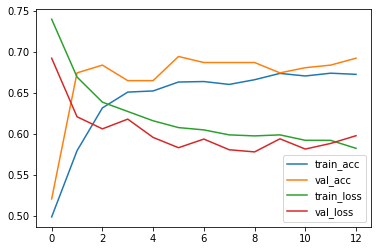


 0.6926315789473684, 0.3859629187700395, 0.6795918367346939, 0.7065217391304348, [[325 135]
 [157 333]] 

Epoch 1/100
268/268 [==============================] - 5s 19ms/step - loss: 0.7193 - accuracy: 0.4932 - val_loss: 0.6917 - val_accuracy: 0.5242
Epoch 2/100
268/268 [==============================] - 5s 18ms/step - loss: 0.6649 - accuracy: 0.5901 - val_loss: 0.6211 - val_accuracy: 0.6758
Epoch 3/100
268/268 [==============================] - 5s 19ms/step - loss: 0.6422 - accuracy: 0.6177 - val_loss: 0.6213 - val_accuracy: 0.6716
Epoch 4/100
268/268 [==============================] - 5s 19ms/step - loss: 0.6331 - accuracy: 0.6352 - val_loss: 0.6228 - val_accuracy: 0.6495
Epoch 5/100
268/268 [==============================] - 5s 19ms/step - loss: 0.6282 - accuracy: 0.6498 - val_loss: 0.6191 - val_accuracy: 0.6600
Epoch 6/100
268/268 [==============================] - 5s 19ms/step - loss: 0.6274 - accuracy: 0.6418 - val_loss: 0.6057 - val_accuracy: 0.6926
Epoch 7/100
268/268 [========

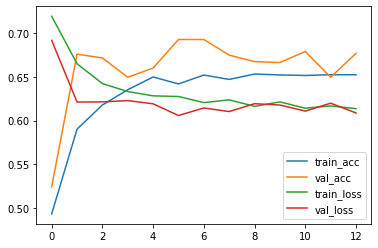


 0.6768421052631579, 0.36889719722357955, 0.8, 0.5587628865979382, [[271 214]
 [ 93 372]] 

Epoch 1/100
268/268 [==============================] - 5s 17ms/step - loss: 0.7060 - accuracy: 0.5553 - val_loss: 0.6442 - val_accuracy: 0.6547
Epoch 2/100
268/268 [==============================] - 4s 16ms/step - loss: 0.6356 - accuracy: 0.6307 - val_loss: 0.6094 - val_accuracy: 0.6863
Epoch 3/100
268/268 [==============================] - 5s 18ms/step - loss: 0.6191 - accuracy: 0.6384 - val_loss: 0.5952 - val_accuracy: 0.6926
Epoch 4/100
268/268 [==============================] - 5s 19ms/step - loss: 0.6165 - accuracy: 0.6511 - val_loss: 0.5719 - val_accuracy: 0.7011
Epoch 5/100
268/268 [==============================] - 5s 18ms/step - loss: 0.6057 - accuracy: 0.6521 - val_loss: 0.5824 - val_accuracy: 0.6937
Epoch 6/100
268/268 [==============================] - 5s 18ms/step - loss: 0.5926 - accuracy: 0.6583 - val_loss: 0.5824 - val_accuracy: 0.6895
Epoch 7/100
268/268 [======================

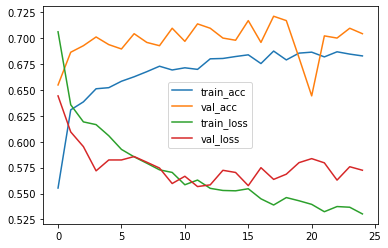


 0.7042105263157895, 0.4157615757311479, 0.7923728813559322, 0.6171548117154811, [[295 183]
 [ 98 374]] 

Epoch 1/100
268/268 [==============================] - 5s 18ms/step - loss: 0.7033 - accuracy: 0.5471 - val_loss: 0.6498 - val_accuracy: 0.6263
Epoch 2/100
268/268 [==============================] - 5s 19ms/step - loss: 0.6391 - accuracy: 0.6441 - val_loss: 0.6210 - val_accuracy: 0.6621
Epoch 3/100
268/268 [==============================] - 5s 18ms/step - loss: 0.6280 - accuracy: 0.6515 - val_loss: 0.6114 - val_accuracy: 0.6737
Epoch 4/100
268/268 [==============================] - 5s 18ms/step - loss: 0.6199 - accuracy: 0.6589 - val_loss: 0.6043 - val_accuracy: 0.6884
Epoch 5/100
268/268 [==============================] - 5s 19ms/step - loss: 0.6172 - accuracy: 0.6638 - val_loss: 0.6138 - val_accuracy: 0.6663
Epoch 6/100
268/268 [==============================] - 5s 18ms/step - loss: 0.6104 - accuracy: 0.6706 - val_loss: 0.6088 - val_accuracy: 0.6695
Epoch 7/100
268/268 [========

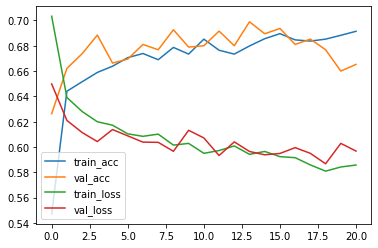


 0.6652631578947369, 0.3611178673989675, 0.8842975206611571, 0.43776824034334766, [[204 262]
 [ 56 428]] 

Epoch 1/100
268/268 [==============================] - 6s 19ms/step - loss: 0.7099 - accuracy: 0.4871 - val_loss: 0.6932 - val_accuracy: 0.4895
Epoch 2/100
268/268 [==============================] - 5s 19ms/step - loss: 0.6728 - accuracy: 0.5695 - val_loss: 0.6041 - val_accuracy: 0.6821
Epoch 3/100
268/268 [==============================] - 5s 19ms/step - loss: 0.6252 - accuracy: 0.6462 - val_loss: 0.5732 - val_accuracy: 0.6947
Epoch 4/100
268/268 [==============================] - 5s 19ms/step - loss: 0.6075 - accuracy: 0.6710 - val_loss: 0.5779 - val_accuracy: 0.7011
Epoch 5/100
268/268 [==============================] - 5s 19ms/step - loss: 0.5995 - accuracy: 0.6743 - val_loss: 0.5627 - val_accuracy: 0.7021
Epoch 6/100
268/268 [==============================] - 5s 19ms/step - loss: 0.5834 - accuracy: 0.6879 - val_loss: 0.5604 - val_accuracy: 0.7000
Epoch 7/100
268/268 [=======

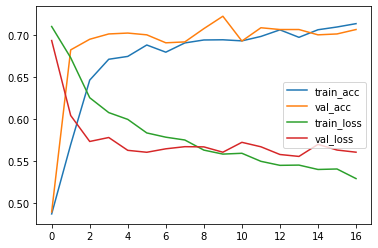


 0.7063157894736842, 0.416664396845902, 0.797938144329897, 0.610752688172043, [[284 181]
 [ 98 387]] 

Epoch 1/100
268/268 [==============================] - 5s 19ms/step - loss: 0.7002 - accuracy: 0.5541 - val_loss: 0.6483 - val_accuracy: 0.6084
Epoch 2/100
268/268 [==============================] - 5s 19ms/step - loss: 0.6391 - accuracy: 0.6386 - val_loss: 0.6313 - val_accuracy: 0.6347
Epoch 3/100
268/268 [==============================] - 5s 18ms/step - loss: 0.6213 - accuracy: 0.6554 - val_loss: 0.6248 - val_accuracy: 0.6411
Epoch 4/100
268/268 [==============================] - 5s 19ms/step - loss: 0.6136 - accuracy: 0.6562 - val_loss: 0.6221 - val_accuracy: 0.6526
Epoch 5/100
268/268 [==============================] - 5s 19ms/step - loss: 0.6065 - accuracy: 0.6610 - val_loss: 0.6210 - val_accuracy: 0.6674
Epoch 6/100
268/268 [==============================] - 5s 19ms/step - loss: 0.5992 - accuracy: 0.6762 - val_loss: 0.6078 - val_accuracy: 0.6726
Epoch 7/100
268/268 [===========

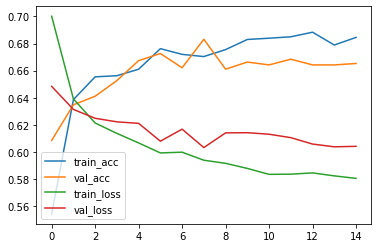


 0.6652631578947369, 0.3368782186809915, 0.7967145790554415, 0.5269978401727862, [[244 219]
 [ 99 388]] 

Epoch 1/100
268/268 [==============================] - 6s 19ms/step - loss: 0.7198 - accuracy: 0.5057 - val_loss: 0.6933 - val_accuracy: 0.4895
Epoch 2/100
268/268 [==============================] - 5s 19ms/step - loss: 0.6669 - accuracy: 0.5796 - val_loss: 0.6197 - val_accuracy: 0.6737
Epoch 3/100
268/268 [==============================] - 5s 19ms/step - loss: 0.6284 - accuracy: 0.6444 - val_loss: 0.6136 - val_accuracy: 0.6705
Epoch 4/100
268/268 [==============================] - 5s 18ms/step - loss: 0.6103 - accuracy: 0.6609 - val_loss: 0.5950 - val_accuracy: 0.6863
Epoch 5/100
268/268 [==============================] - 5s 19ms/step - loss: 0.6015 - accuracy: 0.6699 - val_loss: 0.6195 - val_accuracy: 0.6263
Epoch 6/100
268/268 [==============================] - 5s 19ms/step - loss: 0.5989 - accuracy: 0.6705 - val_loss: 0.5965 - val_accuracy: 0.6895
Epoch 7/100
268/268 [========

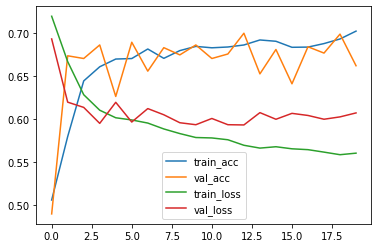


 0.6621052631578948, 0.32635241798581205, 0.6268041237113402, 0.6989247311827957, [[325 140]
 [181 304]] 

Epoch 1/100
268/268 [==============================] - 5s 19ms/step - loss: 0.6839 - accuracy: 0.5743 - val_loss: 0.6548 - val_accuracy: 0.6063
Epoch 2/100
268/268 [==============================] - 5s 19ms/step - loss: 0.6243 - accuracy: 0.6490 - val_loss: 0.6050 - val_accuracy: 0.6758
Epoch 3/100
268/268 [==============================] - 5s 19ms/step - loss: 0.6049 - accuracy: 0.6707 - val_loss: 0.5860 - val_accuracy: 0.6916
Epoch 4/100
268/268 [==============================] - 5s 19ms/step - loss: 0.6050 - accuracy: 0.6685 - val_loss: 0.5898 - val_accuracy: 0.6621
Epoch 5/100
268/268 [==============================] - 5s 18ms/step - loss: 0.5866 - accuracy: 0.6827 - val_loss: 0.5857 - val_accuracy: 0.6811
Epoch 6/100
268/268 [==============================] - 5s 19ms/step - loss: 0.5837 - accuracy: 0.6863 - val_loss: 0.5819 - val_accuracy: 0.6779
Epoch 7/100
268/268 [=======

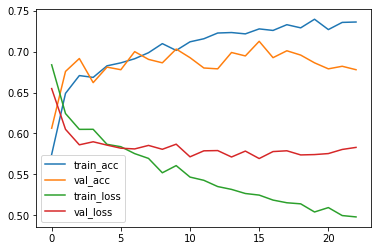


 0.6778947368421052, 0.3687180640144465, 0.8134171907756813, 0.5412262156448203, [[256 217]
 [ 89 388]] 

Epoch 1/100
268/268 [==============================] - 6s 19ms/step - loss: 0.7117 - accuracy: 0.5001 - val_loss: 0.6932 - val_accuracy: 0.4884
Epoch 2/100
268/268 [==============================] - 5s 19ms/step - loss: 0.6789 - accuracy: 0.5509 - val_loss: 0.6350 - val_accuracy: 0.6411
Epoch 3/100
268/268 [==============================] - 5s 19ms/step - loss: 0.6435 - accuracy: 0.6321 - val_loss: 0.6067 - val_accuracy: 0.6716
Epoch 4/100
268/268 [==============================] - 5s 18ms/step - loss: 0.6264 - accuracy: 0.6443 - val_loss: 0.5966 - val_accuracy: 0.6916
Epoch 5/100
268/268 [==============================] - 5s 19ms/step - loss: 0.6214 - accuracy: 0.6557 - val_loss: 0.6031 - val_accuracy: 0.6716
Epoch 6/100
268/268 [==============================] - 5s 19ms/step - loss: 0.6099 - accuracy: 0.6627 - val_loss: 0.5990 - val_accuracy: 0.6937
Epoch 7/100
268/268 [========

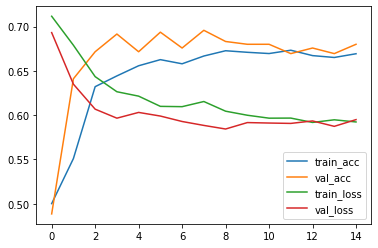


 0.68, 0.36580664462485474, 0.7478448275862069, 0.6152263374485597, [[299 187]
 [117 347]] 

Epoch 1/100
268/268 [==============================] - 6s 19ms/step - loss: 0.7147 - accuracy: 0.4939 - val_loss: 0.6930 - val_accuracy: 0.5364
Epoch 2/100
268/268 [==============================] - 5s 19ms/step - loss: 0.6934 - accuracy: 0.4980 - val_loss: 0.6932 - val_accuracy: 0.4636
Epoch 3/100
268/268 [==============================] - 5s 19ms/step - loss: 0.6932 - accuracy: 0.5063 - val_loss: 0.6919 - val_accuracy: 0.5364
Epoch 4/100
268/268 [==============================] - 5s 19ms/step - loss: 0.6934 - accuracy: 0.4977 - val_loss: 0.6922 - val_accuracy: 0.5364
Epoch 5/100
268/268 [==============================] - 5s 19ms/step - loss: 0.6933 - accuracy: 0.5075 - val_loss: 0.6948 - val_accuracy: 0.4636
Epoch 6/100
268/268 [==============================] - 5s 19ms/step - loss: 0.6934 - accuracy: 0.4932 - val_loss: 0.6933 - val_accuracy: 0.4636
Epoch 7/100
268/268 [=====================

/home/suresh/anaconda3/envs/bio/lib/python3.9/site-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


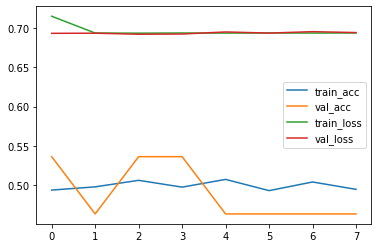


 0.4636459430979979, 0.0, 1.0, 0.0, [[  0 509]
 [  0 440]] 



In [28]:
iterations = 1

for i in range(iterations):
    kfold = KFold(10, shuffle=True)

    for train, val in kfold.split(X_train_pt5):

        model = CNN_1D()
        model.compile(optimizer=Adam(learning_rate=1e-2),
                  loss=BinaryCrossentropy(),
                  metrics=['accuracy'])

        X_train_pt, X_val_pt = X_train_pt5[train], X_train_pt5[val]
        y_train_pt, y_val = y_train[train], y_train[val]

        metric = 'val_accuracy'
        checkpointer = ModelCheckpoint(filepath="models/st_model_best.h5",
                                    monitor = metric,
                                    verbose=0, 
                                    save_weights_only=False,
                                    save_best_only=True)

        es = EarlyStopping(monitor='val_accuracy',patience=7,mode='auto')

        # Training and Evaluation
        history = model.fit(X_train_pt, y_train_pt, epochs=100, verbose=1, validation_data = (X_val_pt, y_val), callbacks = [es])

        y_pred = model.predict(X_val_pt).reshape(y_val.shape[0],)
        y_pred = (y_pred > 0.5)
        y_pred = [int(i) for i in y_pred]
        y_val = np.array(y_val)
        y_pred = np.array(y_pred)

        cm = confusion_matrix(y_val, y_pred)
        mcc = matthews_corrcoef(y_val, y_pred)
        acc = accuracy_score(y_val, y_pred)

        sn = cm[1][1]/(cm[1][1]+cm[1][0])
        sp = cm[0][0]/(cm[0][0]+cm[0][1])


        plot(history)
        print("\n %s, %s, %s, %s, %s \n" %(str(acc), str(mcc), str(sn), str(sp), cm))

### Iterative 10-Fold CV for CNN_LSTM model

Epoch 1/100
268/268 [==============================] - 116s 428ms/step - loss: 0.6934 - accuracy: 0.4951 - val_loss: 0.6936 - val_accuracy: 0.4779
Epoch 2/100
268/268 [==============================] - 113s 423ms/step - loss: 0.6933 - accuracy: 0.5013 - val_loss: 0.6935 - val_accuracy: 0.4779
Epoch 3/100
268/268 [==============================] - 113s 423ms/step - loss: 0.6932 - accuracy: 0.5012 - val_loss: 0.6934 - val_accuracy: 0.4779
Epoch 4/100
268/268 [==============================] - 114s 424ms/step - loss: 0.6932 - accuracy: 0.5039 - val_loss: 0.6933 - val_accuracy: 0.4779
Epoch 5/100
268/268 [==============================] - 115s 429ms/step - loss: 0.6931 - accuracy: 0.5052 - val_loss: 0.6933 - val_accuracy: 0.4779
Epoch 6/100
268/268 [==============================] - 114s 425ms/step - loss: 0.6930 - accuracy: 0.5111 - val_loss: 0.6933 - val_accuracy: 0.4789
Epoch 7/100
268/268 [==============================] - 114s 424ms/step - loss: 0.6930 - accuracy: 0.5074 - val_loss: 0

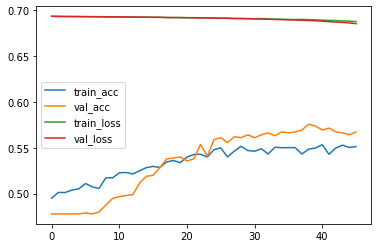


 0.5673684210526316, 0.13414241122787637, 0.5616740088105727, 0.5725806451612904, [[284 212]
 [199 255]] 

Epoch 1/100
268/268 [==============================] - 116s 426ms/step - loss: 0.6931 - accuracy: 0.5040 - val_loss: 0.6931 - val_accuracy: 0.4821
Epoch 2/100
268/268 [==============================] - 114s 426ms/step - loss: 0.6930 - accuracy: 0.5116 - val_loss: 0.6930 - val_accuracy: 0.5179
Epoch 3/100
268/268 [==============================] - 114s 427ms/step - loss: 0.6929 - accuracy: 0.5254 - val_loss: 0.6931 - val_accuracy: 0.5074
Epoch 4/100
268/268 [==============================] - 114s 426ms/step - loss: 0.6926 - accuracy: 0.5240 - val_loss: 0.6931 - val_accuracy: 0.4884
Epoch 5/100
268/268 [==============================] - 114s 425ms/step - loss: 0.6926 - accuracy: 0.5212 - val_loss: 0.6930 - val_accuracy: 0.4832
Epoch 6/100
268/268 [==============================] - 114s 424ms/step - loss: 0.6926 - accuracy: 0.5199 - val_loss: 0.6930 - val_accuracy: 0.4800
Epoch 7/10

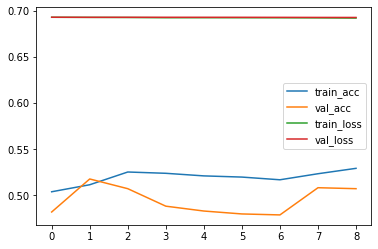


 0.5073684210526316, 0.04036161480250236, 0.3153692614770459, 0.7216035634743875, [[324 125]
 [343 158]] 

Epoch 1/100
268/268 [==============================] - 119s 438ms/step - loss: 0.6926 - accuracy: 0.5219 - val_loss: 0.6925 - val_accuracy: 0.5326
Epoch 2/100
268/268 [==============================] - 117s 437ms/step - loss: 0.6924 - accuracy: 0.5261 - val_loss: 0.6924 - val_accuracy: 0.5295
Epoch 3/100
268/268 [==============================] - 117s 437ms/step - loss: 0.6923 - accuracy: 0.5250 - val_loss: 0.6924 - val_accuracy: 0.5116
Epoch 4/100
268/268 [==============================] - 117s 436ms/step - loss: 0.6920 - accuracy: 0.5370 - val_loss: 0.6923 - val_accuracy: 0.5137
Epoch 5/100
268/268 [==============================] - 117s 438ms/step - loss: 0.6921 - accuracy: 0.5304 - val_loss: 0.6922 - val_accuracy: 0.5211
Epoch 6/100
268/268 [==============================] - 117s 437ms/step - loss: 0.6919 - accuracy: 0.5305 - val_loss: 0.6922 - val_accuracy: 0.5232
Epoch 7/10

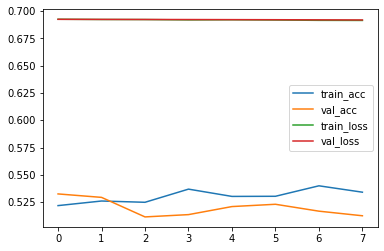


 0.5126315789473684, 0.027287036731004806, 0.46804123711340206, 0.5591397849462365, [[260 205]
 [258 227]] 

Epoch 1/100
268/268 [==============================] - 121s 445ms/step - loss: 0.6930 - accuracy: 0.5135 - val_loss: 0.6931 - val_accuracy: 0.5516
Epoch 2/100
268/268 [==============================] - 118s 442ms/step - loss: 0.6930 - accuracy: 0.5190 - val_loss: 0.6930 - val_accuracy: 0.5284
Epoch 3/100
268/268 [==============================] - 119s 445ms/step - loss: 0.6930 - accuracy: 0.5147 - val_loss: 0.6929 - val_accuracy: 0.5337
Epoch 4/100
268/268 [==============================] - 119s 445ms/step - loss: 0.6930 - accuracy: 0.5120 - val_loss: 0.6929 - val_accuracy: 0.5400
Epoch 5/100
268/268 [==============================] - 119s 443ms/step - loss: 0.6929 - accuracy: 0.5217 - val_loss: 0.6927 - val_accuracy: 0.5474
Epoch 6/100
268/268 [==============================] - 119s 443ms/step - loss: 0.6928 - accuracy: 0.5319 - val_loss: 0.6926 - val_accuracy: 0.5568
Epoch 7/

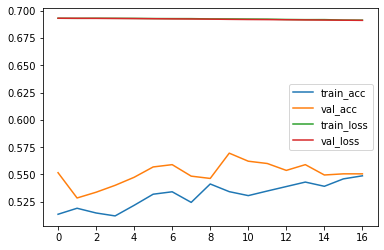


 0.5505263157894736, 0.10340585045044726, 0.5051546391752577, 0.5978494623655914, [[278 187]
 [240 245]] 

Epoch 1/100
268/268 [==============================] - 115s 422ms/step - loss: 0.6932 - accuracy: 0.5018 - val_loss: 0.6931 - val_accuracy: 0.4874
Epoch 2/100
268/268 [==============================] - 113s 421ms/step - loss: 0.6931 - accuracy: 0.5016 - val_loss: 0.6931 - val_accuracy: 0.4905
Epoch 3/100
268/268 [==============================] - 112s 420ms/step - loss: 0.6931 - accuracy: 0.5050 - val_loss: 0.6930 - val_accuracy: 0.5295
Epoch 4/100
268/268 [==============================] - 113s 420ms/step - loss: 0.6930 - accuracy: 0.5250 - val_loss: 0.6929 - val_accuracy: 0.5379
Epoch 5/100
268/268 [==============================] - 113s 420ms/step - loss: 0.6929 - accuracy: 0.5284 - val_loss: 0.6928 - val_accuracy: 0.5653
Epoch 6/100
268/268 [==============================] - 113s 420ms/step - loss: 0.6930 - accuracy: 0.5217 - val_loss: 0.6928 - val_accuracy: 0.5747
Epoch 7/10

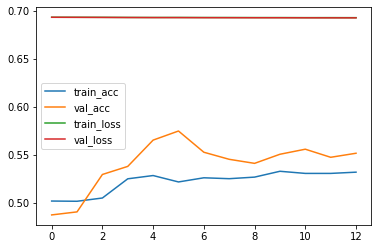


 0.5515789473684211, 0.10880574547258012, 0.7800829875518672, 0.3162393162393162, [[148 320]
 [106 376]] 

Epoch 1/100
268/268 [==============================] - 115s 423ms/step - loss: 0.6934 - accuracy: 0.5003 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 2/100
268/268 [==============================] - 113s 421ms/step - loss: 0.6930 - accuracy: 0.5001 - val_loss: 0.6931 - val_accuracy: 0.4989
Epoch 3/100
268/268 [==============================] - 113s 421ms/step - loss: 0.6930 - accuracy: 0.5001 - val_loss: 0.6929 - val_accuracy: 0.4989
Epoch 4/100
268/268 [==============================] - 113s 421ms/step - loss: 0.6928 - accuracy: 0.4996 - val_loss: 0.6928 - val_accuracy: 0.4989
Epoch 5/100
268/268 [==============================] - 113s 421ms/step - loss: 0.6928 - accuracy: 0.5011 - val_loss: 0.6927 - val_accuracy: 0.4989
Epoch 6/100
268/268 [==============================] - 113s 421ms/step - loss: 0.6927 - accuracy: 0.5004 - val_loss: 0.6926 - val_accuracy: 0.4989
Epoch 7/10

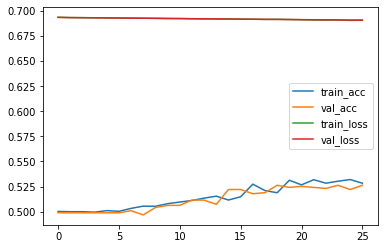


 0.5263157894736842, 0.05880030043672736, 0.31932773109243695, 0.7341772151898734, [[348 126]
 [324 152]] 

Epoch 1/100
268/268 [==============================] - 121s 445ms/step - loss: 0.6930 - accuracy: 0.5043 - val_loss: 0.6932 - val_accuracy: 0.4789
Epoch 2/100
268/268 [==============================] - 119s 444ms/step - loss: 0.6929 - accuracy: 0.5051 - val_loss: 0.6932 - val_accuracy: 0.4789
Epoch 3/100
268/268 [==============================] - 119s 444ms/step - loss: 0.6929 - accuracy: 0.5057 - val_loss: 0.6931 - val_accuracy: 0.4800
Epoch 4/100
268/268 [==============================] - 119s 444ms/step - loss: 0.6928 - accuracy: 0.5130 - val_loss: 0.6931 - val_accuracy: 0.4947
Epoch 5/100
268/268 [==============================] - 119s 444ms/step - loss: 0.6925 - accuracy: 0.5215 - val_loss: 0.6928 - val_accuracy: 0.5158
Epoch 6/100
268/268 [==============================] - 119s 444ms/step - loss: 0.6925 - accuracy: 0.5251 - val_loss: 0.6926 - val_accuracy: 0.5095
Epoch 7/1

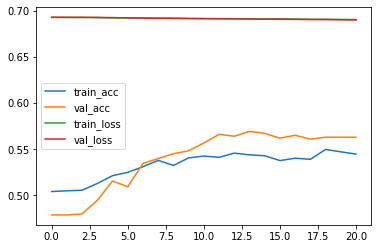


 0.5631578947368421, 0.13450245317164577, 0.6461538461538462, 0.4868686868686869, [[241 254]
 [161 294]] 

Epoch 1/100
268/268 [==============================] - 113s 414ms/step - loss: 0.6932 - accuracy: 0.4955 - val_loss: 0.6932 - val_accuracy: 0.4916
Epoch 2/100
268/268 [==============================] - 110s 412ms/step - loss: 0.6932 - accuracy: 0.5019 - val_loss: 0.6931 - val_accuracy: 0.4905
Epoch 3/100
268/268 [==============================] - 111s 413ms/step - loss: 0.6931 - accuracy: 0.5009 - val_loss: 0.6930 - val_accuracy: 0.4926
Epoch 4/100
268/268 [==============================] - 111s 413ms/step - loss: 0.6929 - accuracy: 0.5079 - val_loss: 0.6929 - val_accuracy: 0.4989
Epoch 5/100
268/268 [==============================] - 111s 413ms/step - loss: 0.6928 - accuracy: 0.5206 - val_loss: 0.6928 - val_accuracy: 0.4968
Epoch 6/100
268/268 [==============================] - 111s 413ms/step - loss: 0.6927 - accuracy: 0.5225 - val_loss: 0.6927 - val_accuracy: 0.5032
Epoch 7/10

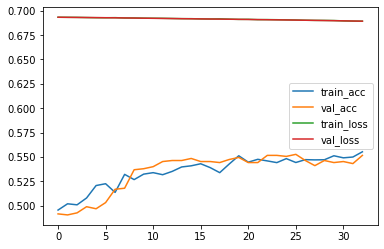


 0.5515789473684211, 0.10309918094492872, 0.5541666666666667, 0.548936170212766, [[258 212]
 [214 266]] 

Epoch 1/100
268/268 [==============================] - 116s 426ms/step - loss: 0.6928 - accuracy: 0.5115 - val_loss: 0.6931 - val_accuracy: 0.4863
Epoch 2/100
268/268 [==============================] - 114s 425ms/step - loss: 0.6929 - accuracy: 0.5058 - val_loss: 0.6930 - val_accuracy: 0.4874
Epoch 3/100
268/268 [==============================] - 114s 425ms/step - loss: 0.6928 - accuracy: 0.5091 - val_loss: 0.6930 - val_accuracy: 0.4926
Epoch 4/100
268/268 [==============================] - 114s 424ms/step - loss: 0.6927 - accuracy: 0.5091 - val_loss: 0.6929 - val_accuracy: 0.4916
Epoch 5/100
268/268 [==============================] - 114s 425ms/step - loss: 0.6926 - accuracy: 0.5087 - val_loss: 0.6929 - val_accuracy: 0.4905
Epoch 6/100
268/268 [==============================] - 114s 424ms/step - loss: 0.6925 - accuracy: 0.5121 - val_loss: 0.6928 - val_accuracy: 0.5011
Epoch 7/100

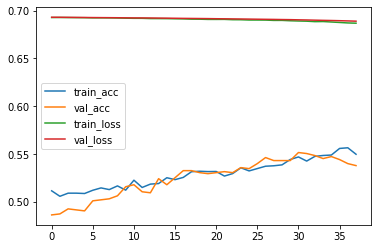


 0.5378947368421053, 0.08200096075349686, 0.4455852156057495, 0.6349892008639308, [[294 169]
 [270 217]] 

Epoch 1/100
268/268 [==============================] - 113s 417ms/step - loss: 0.6930 - accuracy: 0.5097 - val_loss: 0.6929 - val_accuracy: 0.5711
Epoch 2/100
268/268 [==============================] - 111s 415ms/step - loss: 0.6928 - accuracy: 0.5257 - val_loss: 0.6929 - val_accuracy: 0.5195
Epoch 3/100
268/268 [==============================] - 111s 414ms/step - loss: 0.6928 - accuracy: 0.5201 - val_loss: 0.6930 - val_accuracy: 0.4932
Epoch 4/100
268/268 [==============================] - 111s 415ms/step - loss: 0.6928 - accuracy: 0.5240 - val_loss: 0.6930 - val_accuracy: 0.4868
Epoch 5/100
268/268 [==============================] - 111s 415ms/step - loss: 0.6927 - accuracy: 0.5213 - val_loss: 0.6931 - val_accuracy: 0.4858
Epoch 6/100
268/268 [==============================] - 111s 415ms/step - loss: 0.6926 - accuracy: 0.5193 - val_loss: 0.6930 - val_accuracy: 0.4910
Epoch 7/10

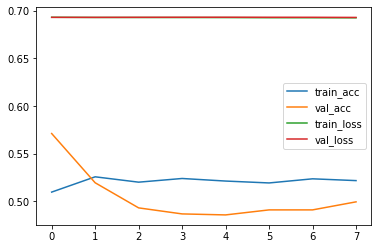


 0.4994731296101159, 0.11580761020334197, 0.9684684684684685, 0.08712871287128712, [[ 44 461]
 [ 14 430]] 



In [19]:
iterations = 1

for i in range(iterations):
    kfold = KFold(10, shuffle=True)

    for train, val in kfold.split(X_train_pt5):

        model = CNN_LSTM()
        model.compile(optimizer=Adam(learning_rate=1e-5),
                  loss=BinaryCrossentropy(),
                  metrics=['accuracy'])

        X_train_pt, X_val_pt = X_train_pt5[train], X_train_pt5[val]
        y_train_pt, y_val = y_train[train], y_train[val]

        metric = 'val_accuracy'
        checkpointer = ModelCheckpoint(filepath="models/st_model_best.h5",
                                    monitor = metric,
                                    verbose=0, 
                                    save_weights_only=False,
                                    save_best_only=True)

        es = EarlyStopping(monitor='val_accuracy',patience=7,mode='auto')

        # Training and Evaluation
        history = model.fit(X_train_pt, y_train_pt, epochs=100, verbose=1, validation_data = (X_val_pt, y_val), callbacks = [es])

        y_pred = model.predict(X_val_pt).reshape(y_val.shape[0],)
        y_pred = (y_pred > 0.5)
        y_pred = [int(i) for i in y_pred]
        y_val = np.array(y_val)
        y_pred = np.array(y_pred)

        cm = confusion_matrix(y_val, y_pred)
        mcc = matthews_corrcoef(y_val, y_pred)
        acc = accuracy_score(y_val, y_pred)

        sn = cm[1][1]/(cm[1][1]+cm[1][0])
        sp = cm[0][0]/(cm[0][0]+cm[0][1])


        plot(history)
        print("\n %s, %s, %s, %s, %s \n" %(str(acc), str(mcc), str(sn), str(sp), cm))

### Iterative 10-Fold CV for ANN model

2022-05-24 16:09:12.363417: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-24 16:09:12.363577: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-05-24 16:09:12.363686: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-05-24 16:09:12.365887: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory
2022-05-24 16:09:12.365942: W tensorflow/stream_executor/platform/default/dso_loader

Epoch 1/100
268/268 [==============================] - 2s 5ms/step - loss: 0.6971 - accuracy: 0.5311 - val_loss: 0.6744 - val_accuracy: 0.6011
Epoch 2/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6794 - accuracy: 0.5635 - val_loss: 0.6599 - val_accuracy: 0.6495
Epoch 3/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6659 - accuracy: 0.6024 - val_loss: 0.6481 - val_accuracy: 0.6600
Epoch 4/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6559 - accuracy: 0.6079 - val_loss: 0.6385 - val_accuracy: 0.6758
Epoch 5/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6438 - accuracy: 0.6255 - val_loss: 0.6300 - val_accuracy: 0.6695
Epoch 6/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6368 - accuracy: 0.6389 - val_loss: 0.6229 - val_accuracy: 0.6726
Epoch 7/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6203 - accuracy: 0.6623 - val_loss: 0.6166 - val_accuracy: 0.6779

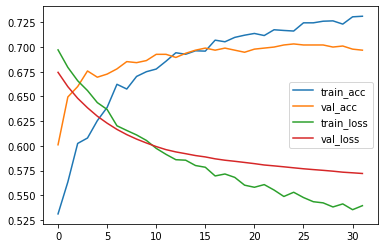


 0.6968421052631579, 0.39484536036860246, 0.7373949579831933, 0.6561181434599156, [[311 163]
 [125 351]] 

Epoch 1/100
268/268 [==============================] - 2s 5ms/step - loss: 0.7088 - accuracy: 0.5135 - val_loss: 0.6777 - val_accuracy: 0.5905
Epoch 2/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6853 - accuracy: 0.5576 - val_loss: 0.6609 - val_accuracy: 0.6347
Epoch 3/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6666 - accuracy: 0.5918 - val_loss: 0.6485 - val_accuracy: 0.6547
Epoch 4/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6566 - accuracy: 0.6058 - val_loss: 0.6374 - val_accuracy: 0.6737
Epoch 5/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6448 - accuracy: 0.6250 - val_loss: 0.6276 - val_accuracy: 0.6842
Epoch 6/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6432 - accuracy: 0.6322 - val_loss: 0.6193 - val_accuracy: 0.6884
Epoch 7/100
268/268 [=============

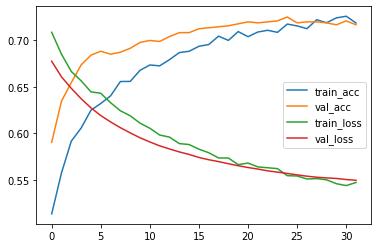


 0.716842105263158, 0.4348899969326226, 0.7505285412262156, 0.6834381551362684, [[326 151]
 [118 355]] 

Epoch 1/100
268/268 [==============================] - 2s 5ms/step - loss: 0.7106 - accuracy: 0.5146 - val_loss: 0.6885 - val_accuracy: 0.5474
Epoch 2/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6912 - accuracy: 0.5459 - val_loss: 0.6727 - val_accuracy: 0.5937
Epoch 3/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6718 - accuracy: 0.5824 - val_loss: 0.6601 - val_accuracy: 0.6189
Epoch 4/100
268/268 [==============================] - 1s 5ms/step - loss: 0.6621 - accuracy: 0.6019 - val_loss: 0.6496 - val_accuracy: 0.6347
Epoch 5/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6502 - accuracy: 0.6203 - val_loss: 0.6401 - val_accuracy: 0.6505
Epoch 6/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6396 - accuracy: 0.6423 - val_loss: 0.6321 - val_accuracy: 0.6484
Epoch 7/100
268/268 [===============

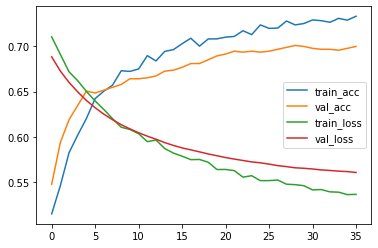


 0.7, 0.4003914881143714, 0.7221052631578947, 0.6778947368421052, [[322 153]
 [132 343]] 

Epoch 1/100
268/268 [==============================] - 2s 5ms/step - loss: 0.7032 - accuracy: 0.5246 - val_loss: 0.6828 - val_accuracy: 0.5632
Epoch 2/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6852 - accuracy: 0.5484 - val_loss: 0.6682 - val_accuracy: 0.6084
Epoch 3/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6718 - accuracy: 0.5843 - val_loss: 0.6577 - val_accuracy: 0.6200
Epoch 4/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6604 - accuracy: 0.5962 - val_loss: 0.6487 - val_accuracy: 0.6337
Epoch 5/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6471 - accuracy: 0.6297 - val_loss: 0.6414 - val_accuracy: 0.6411
Epoch 6/100
268/268 [==============================] - 1s 5ms/step - loss: 0.6403 - accuracy: 0.6346 - val_loss: 0.6349 - val_accuracy: 0.6537
Epoch 7/100
268/268 [=============================

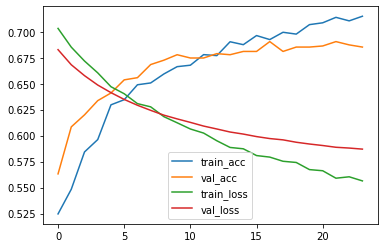


 0.6852631578947368, 0.36843219037653374, 0.7142857142857143, 0.6534216335540839, [[296 157]
 [142 355]] 

Epoch 1/100
268/268 [==============================] - 2s 4ms/step - loss: 0.7044 - accuracy: 0.5224 - val_loss: 0.6783 - val_accuracy: 0.5695
Epoch 2/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6844 - accuracy: 0.5556 - val_loss: 0.6626 - val_accuracy: 0.5979
Epoch 3/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6712 - accuracy: 0.5829 - val_loss: 0.6493 - val_accuracy: 0.6316
Epoch 4/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6574 - accuracy: 0.6064 - val_loss: 0.6384 - val_accuracy: 0.6379
Epoch 5/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6483 - accuracy: 0.6200 - val_loss: 0.6293 - val_accuracy: 0.6505
Epoch 6/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6388 - accuracy: 0.6343 - val_loss: 0.6209 - val_accuracy: 0.6632
Epoch 7/100
268/268 [=============

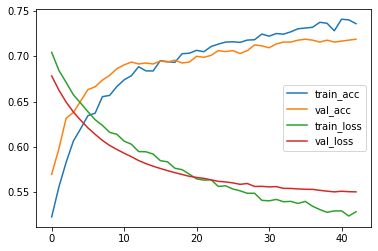


 0.7189473684210527, 0.44234506407713586, 0.7695652173913043, 0.6714285714285714, [[329 161]
 [106 354]] 

Epoch 1/100
268/268 [==============================] - 2s 5ms/step - loss: 0.7101 - accuracy: 0.5086 - val_loss: 0.6757 - val_accuracy: 0.5842
Epoch 2/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6875 - accuracy: 0.5553 - val_loss: 0.6557 - val_accuracy: 0.6368
Epoch 3/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6752 - accuracy: 0.5784 - val_loss: 0.6405 - val_accuracy: 0.6632
Epoch 4/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6591 - accuracy: 0.6064 - val_loss: 0.6276 - val_accuracy: 0.6842
Epoch 5/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6480 - accuracy: 0.6232 - val_loss: 0.6168 - val_accuracy: 0.6895
Epoch 6/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6408 - accuracy: 0.6284 - val_loss: 0.6074 - val_accuracy: 0.6947
Epoch 7/100
268/268 [=============

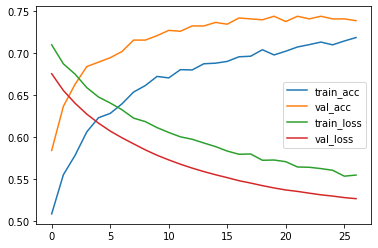


 0.7389473684210527, 0.478723176105127, 0.7653276955602537, 0.7127882599580713, [[340 137]
 [111 362]] 

Epoch 1/100
268/268 [==============================] - 2s 4ms/step - loss: 0.7057 - accuracy: 0.5135 - val_loss: 0.6817 - val_accuracy: 0.5526
Epoch 2/100
268/268 [==============================] - 1s 5ms/step - loss: 0.6866 - accuracy: 0.5561 - val_loss: 0.6646 - val_accuracy: 0.6116
Epoch 3/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6734 - accuracy: 0.5819 - val_loss: 0.6509 - val_accuracy: 0.6411
Epoch 4/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6573 - accuracy: 0.6099 - val_loss: 0.6397 - val_accuracy: 0.6674
Epoch 5/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6510 - accuracy: 0.6146 - val_loss: 0.6306 - val_accuracy: 0.6705
Epoch 6/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6396 - accuracy: 0.6304 - val_loss: 0.6218 - val_accuracy: 0.6747
Epoch 7/100
268/268 [===============

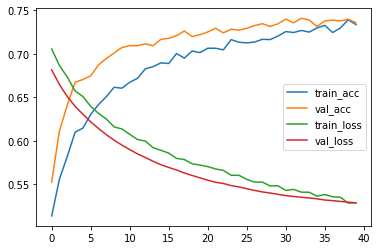


 0.7357894736842105, 0.47332201903724314, 0.7692307692307693, 0.7033195020746889, [[339 143]
 [108 360]] 

Epoch 1/100
268/268 [==============================] - 2s 5ms/step - loss: 0.7074 - accuracy: 0.5142 - val_loss: 0.6732 - val_accuracy: 0.5832
Epoch 2/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6873 - accuracy: 0.5485 - val_loss: 0.6583 - val_accuracy: 0.6189
Epoch 3/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6722 - accuracy: 0.5849 - val_loss: 0.6463 - val_accuracy: 0.6463
Epoch 4/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6636 - accuracy: 0.5989 - val_loss: 0.6362 - val_accuracy: 0.6568
Epoch 5/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6487 - accuracy: 0.6223 - val_loss: 0.6271 - val_accuracy: 0.6579
Epoch 6/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6453 - accuracy: 0.6218 - val_loss: 0.6195 - val_accuracy: 0.6632
Epoch 7/100
268/268 [=============

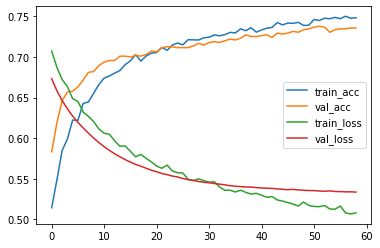


 0.7357894736842105, 0.4722837626351789, 0.7537473233404711, 0.7184265010351967, [[347 136]
 [115 352]] 

Epoch 1/100
268/268 [==============================] - 2s 4ms/step - loss: 0.7084 - accuracy: 0.5004 - val_loss: 0.6874 - val_accuracy: 0.5442
Epoch 2/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6896 - accuracy: 0.5494 - val_loss: 0.6700 - val_accuracy: 0.6011
Epoch 3/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6763 - accuracy: 0.5718 - val_loss: 0.6558 - val_accuracy: 0.6347
Epoch 4/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6629 - accuracy: 0.5983 - val_loss: 0.6439 - val_accuracy: 0.6516
Epoch 5/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6524 - accuracy: 0.6164 - val_loss: 0.6335 - val_accuracy: 0.6611
Epoch 6/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6404 - accuracy: 0.6338 - val_loss: 0.6246 - val_accuracy: 0.6737
Epoch 7/100
268/268 [==============

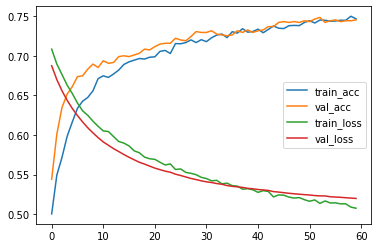


 0.7452631578947368, 0.48805124152517454, 0.7808764940239044, 0.7053571428571429, [[316 132]
 [110 392]] 

Epoch 1/100
268/268 [==============================] - 2s 5ms/step - loss: 0.7023 - accuracy: 0.5198 - val_loss: 0.6817 - val_accuracy: 0.5701
Epoch 2/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6846 - accuracy: 0.5545 - val_loss: 0.6677 - val_accuracy: 0.6080
Epoch 3/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6661 - accuracy: 0.5899 - val_loss: 0.6561 - val_accuracy: 0.6091
Epoch 4/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6561 - accuracy: 0.6029 - val_loss: 0.6463 - val_accuracy: 0.6217
Epoch 5/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6425 - accuracy: 0.6315 - val_loss: 0.6382 - val_accuracy: 0.6333
Epoch 6/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6404 - accuracy: 0.6350 - val_loss: 0.6311 - val_accuracy: 0.6375
Epoch 7/100
268/268 [=============

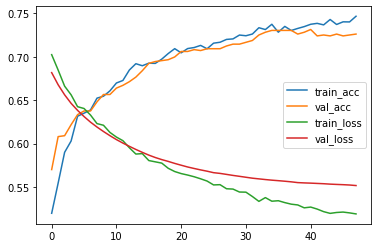


 0.726027397260274, 0.4517775517627652, 0.7248908296943232, 0.7270875763747454, [[357 134]
 [126 332]] 

Epoch 1/100
268/268 [==============================] - 2s 5ms/step - loss: 0.7078 - accuracy: 0.5168 - val_loss: 0.6738 - val_accuracy: 0.5842
Epoch 2/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6846 - accuracy: 0.5607 - val_loss: 0.6591 - val_accuracy: 0.6158
Epoch 3/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6692 - accuracy: 0.5893 - val_loss: 0.6471 - val_accuracy: 0.6253
Epoch 4/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6583 - accuracy: 0.6081 - val_loss: 0.6370 - val_accuracy: 0.6453
Epoch 5/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6447 - accuracy: 0.6326 - val_loss: 0.6284 - val_accuracy: 0.6579
Epoch 6/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6403 - accuracy: 0.6290 - val_loss: 0.6210 - val_accuracy: 0.6684
Epoch 7/100
268/268 [===============

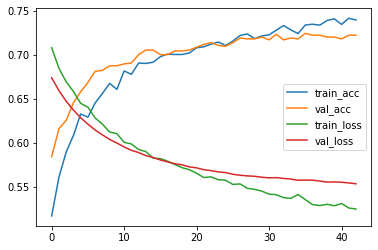


 0.7221052631578947, 0.4462849590927174, 0.75, 0.6963562753036437, [[344 150]
 [114 342]] 

Epoch 1/100
268/268 [==============================] - 2s 5ms/step - loss: 0.7097 - accuracy: 0.5143 - val_loss: 0.6829 - val_accuracy: 0.5558
Epoch 2/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6856 - accuracy: 0.5549 - val_loss: 0.6691 - val_accuracy: 0.5832
Epoch 3/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6745 - accuracy: 0.5764 - val_loss: 0.6577 - val_accuracy: 0.6158
Epoch 4/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6616 - accuracy: 0.5998 - val_loss: 0.6476 - val_accuracy: 0.6316
Epoch 5/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6482 - accuracy: 0.6277 - val_loss: 0.6385 - val_accuracy: 0.6463
Epoch 6/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6432 - accuracy: 0.6311 - val_loss: 0.6309 - val_accuracy: 0.6621
Epoch 7/100
268/268 [============================

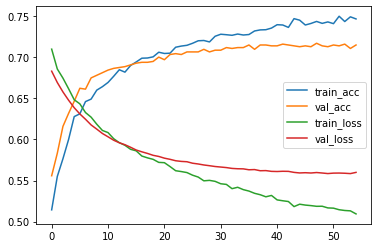


 0.7147368421052631, 0.4293737518397413, 0.7137014314928425, 0.7158351409978309, [[330 131]
 [140 349]] 

Epoch 1/100
268/268 [==============================] - 2s 5ms/step - loss: 0.7142 - accuracy: 0.5144 - val_loss: 0.6774 - val_accuracy: 0.5726
Epoch 2/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6874 - accuracy: 0.5592 - val_loss: 0.6619 - val_accuracy: 0.6147
Epoch 3/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6730 - accuracy: 0.5789 - val_loss: 0.6495 - val_accuracy: 0.6411
Epoch 4/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6553 - accuracy: 0.6085 - val_loss: 0.6388 - val_accuracy: 0.6526
Epoch 5/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6475 - accuracy: 0.6189 - val_loss: 0.6292 - val_accuracy: 0.6653
Epoch 6/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6385 - accuracy: 0.6325 - val_loss: 0.6208 - val_accuracy: 0.6642
Epoch 7/100
268/268 [==============

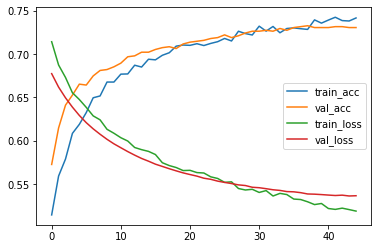


 0.7305263157894737, 0.4609254625372889, 0.7291242362525459, 0.7320261437908496, [[336 123]
 [133 358]] 

Epoch 1/100
268/268 [==============================] - 2s 5ms/step - loss: 0.7039 - accuracy: 0.5252 - val_loss: 0.6682 - val_accuracy: 0.5842
Epoch 2/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6843 - accuracy: 0.5582 - val_loss: 0.6532 - val_accuracy: 0.6368
Epoch 3/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6667 - accuracy: 0.5890 - val_loss: 0.6411 - val_accuracy: 0.6495
Epoch 4/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6571 - accuracy: 0.6025 - val_loss: 0.6310 - val_accuracy: 0.6653
Epoch 5/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6445 - accuracy: 0.6279 - val_loss: 0.6216 - val_accuracy: 0.6884
Epoch 6/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6395 - accuracy: 0.6297 - val_loss: 0.6137 - val_accuracy: 0.6937
Epoch 7/100
268/268 [==============

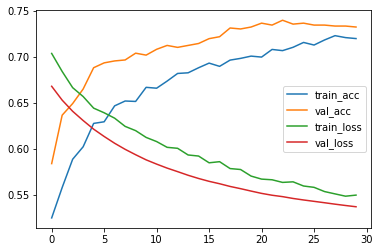


 0.7326315789473684, 0.4652836905761489, 0.7394957983193278, 0.7257383966244726, [[344 130]
 [124 352]] 

Epoch 1/100
268/268 [==============================] - 2s 5ms/step - loss: 0.7118 - accuracy: 0.5027 - val_loss: 0.6831 - val_accuracy: 0.5505
Epoch 2/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6875 - accuracy: 0.5519 - val_loss: 0.6662 - val_accuracy: 0.6063
Epoch 3/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6721 - accuracy: 0.5788 - val_loss: 0.6535 - val_accuracy: 0.6305
Epoch 4/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6582 - accuracy: 0.6038 - val_loss: 0.6429 - val_accuracy: 0.6432
Epoch 5/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6492 - accuracy: 0.6194 - val_loss: 0.6337 - val_accuracy: 0.6579
Epoch 6/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6386 - accuracy: 0.6355 - val_loss: 0.6255 - val_accuracy: 0.6663
Epoch 7/100
268/268 [==============

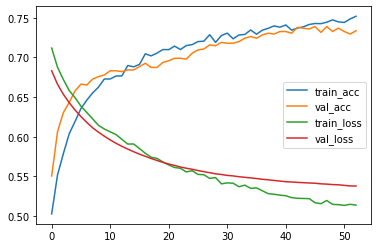


 0.7336842105263158, 0.4678937861307002, 0.7839506172839507, 0.6810344827586207, [[316 148]
 [105 381]] 

Epoch 1/100
268/268 [==============================] - 2s 5ms/step - loss: 0.6965 - accuracy: 0.5330 - val_loss: 0.6709 - val_accuracy: 0.6147
Epoch 2/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6807 - accuracy: 0.5649 - val_loss: 0.6583 - val_accuracy: 0.6337
Epoch 3/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6676 - accuracy: 0.5902 - val_loss: 0.6476 - val_accuracy: 0.6505
Epoch 4/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6557 - accuracy: 0.6108 - val_loss: 0.6383 - val_accuracy: 0.6579
Epoch 5/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6424 - accuracy: 0.6283 - val_loss: 0.6302 - val_accuracy: 0.6705
Epoch 6/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6401 - accuracy: 0.6314 - val_loss: 0.6234 - val_accuracy: 0.6684
Epoch 7/100
268/268 [==============

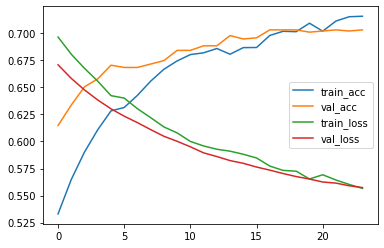


 0.7031578947368421, 0.41181492788663304, 0.7827004219409283, 0.6239495798319328, [[297 179]
 [103 371]] 

Epoch 1/100
268/268 [==============================] - 2s 5ms/step - loss: 0.7123 - accuracy: 0.5054 - val_loss: 0.6798 - val_accuracy: 0.5579
Epoch 2/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6870 - accuracy: 0.5464 - val_loss: 0.6651 - val_accuracy: 0.6042
Epoch 3/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6699 - accuracy: 0.5809 - val_loss: 0.6529 - val_accuracy: 0.6232
Epoch 4/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6594 - accuracy: 0.5957 - val_loss: 0.6425 - val_accuracy: 0.6411
Epoch 5/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6504 - accuracy: 0.6228 - val_loss: 0.6344 - val_accuracy: 0.6516
Epoch 6/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6400 - accuracy: 0.6374 - val_loss: 0.6271 - val_accuracy: 0.6663
Epoch 7/100
268/268 [=============

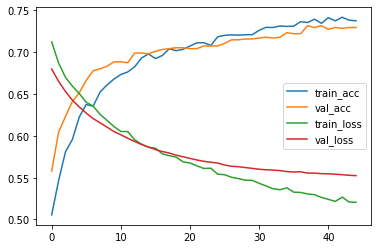


 0.7294736842105263, 0.46138110212232425, 0.7625272331154684, 0.6985743380855397, [[343 148]
 [109 350]] 

Epoch 1/100
268/268 [==============================] - 2s 5ms/step - loss: 0.6971 - accuracy: 0.5362 - val_loss: 0.6720 - val_accuracy: 0.6042
Epoch 2/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6807 - accuracy: 0.5636 - val_loss: 0.6565 - val_accuracy: 0.6253
Epoch 3/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6657 - accuracy: 0.5971 - val_loss: 0.6432 - val_accuracy: 0.6537
Epoch 4/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6530 - accuracy: 0.6210 - val_loss: 0.6315 - val_accuracy: 0.6611
Epoch 5/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6425 - accuracy: 0.6328 - val_loss: 0.6211 - val_accuracy: 0.6726
Epoch 6/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6350 - accuracy: 0.6367 - val_loss: 0.6117 - val_accuracy: 0.6737
Epoch 7/100
268/268 [=============

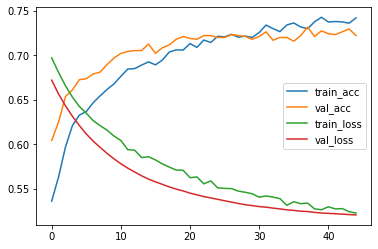


 0.7221052631578947, 0.44460859731417346, 0.7399577167019028, 0.7044025157232704, [[336 141]
 [123 350]] 

Epoch 1/100
268/268 [==============================] - 2s 5ms/step - loss: 0.7076 - accuracy: 0.5173 - val_loss: 0.6789 - val_accuracy: 0.5789
Epoch 2/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6884 - accuracy: 0.5537 - val_loss: 0.6630 - val_accuracy: 0.6179
Epoch 3/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6720 - accuracy: 0.5773 - val_loss: 0.6504 - val_accuracy: 0.6442
Epoch 4/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6587 - accuracy: 0.6053 - val_loss: 0.6400 - val_accuracy: 0.6484
Epoch 5/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6488 - accuracy: 0.6228 - val_loss: 0.6313 - val_accuracy: 0.6600
Epoch 6/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6369 - accuracy: 0.6401 - val_loss: 0.6236 - val_accuracy: 0.6621
Epoch 7/100
268/268 [=============

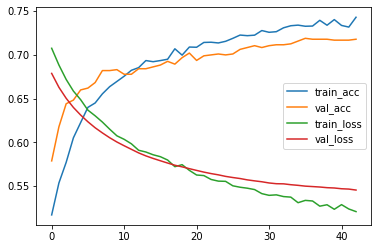


 0.7178947368421053, 0.4356653983178774, 0.7755102040816326, 0.6565217391304348, [[302 158]
 [110 380]] 

Epoch 1/100
268/268 [==============================] - 2s 5ms/step - loss: 0.7028 - accuracy: 0.5277 - val_loss: 0.6851 - val_accuracy: 0.5437
Epoch 2/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6816 - accuracy: 0.5629 - val_loss: 0.6695 - val_accuracy: 0.5933
Epoch 3/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6715 - accuracy: 0.5833 - val_loss: 0.6573 - val_accuracy: 0.6101
Epoch 4/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6594 - accuracy: 0.6007 - val_loss: 0.6472 - val_accuracy: 0.6280
Epoch 5/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6508 - accuracy: 0.6165 - val_loss: 0.6380 - val_accuracy: 0.6365
Epoch 6/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6438 - accuracy: 0.6287 - val_loss: 0.6306 - val_accuracy: 0.6586
Epoch 7/100
268/268 [==============

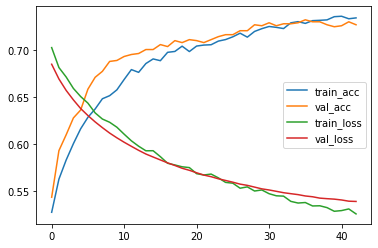


 0.7270811380400422, 0.45859447076661214, 0.7736263736263737, 0.6842105263157895, [[338 156]
 [103 352]] 

Epoch 1/100
268/268 [==============================] - 2s 5ms/step - loss: 0.7086 - accuracy: 0.5253 - val_loss: 0.6739 - val_accuracy: 0.5747
Epoch 2/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6810 - accuracy: 0.5603 - val_loss: 0.6606 - val_accuracy: 0.6084
Epoch 3/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6699 - accuracy: 0.5831 - val_loss: 0.6510 - val_accuracy: 0.6305
Epoch 4/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6518 - accuracy: 0.6105 - val_loss: 0.6424 - val_accuracy: 0.6400
Epoch 5/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6430 - accuracy: 0.6304 - val_loss: 0.6350 - val_accuracy: 0.6484
Epoch 6/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6343 - accuracy: 0.6349 - val_loss: 0.6286 - val_accuracy: 0.6589
Epoch 7/100
268/268 [=============

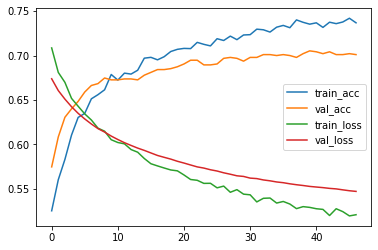


 0.7010526315789474, 0.4030208591201728, 0.7347368421052631, 0.6673684210526316, [[317 158]
 [126 349]] 

Epoch 1/100
268/268 [==============================] - 2s 5ms/step - loss: 0.7017 - accuracy: 0.5224 - val_loss: 0.6727 - val_accuracy: 0.5874
Epoch 2/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6774 - accuracy: 0.5681 - val_loss: 0.6603 - val_accuracy: 0.6211
Epoch 3/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6665 - accuracy: 0.5899 - val_loss: 0.6502 - val_accuracy: 0.6284
Epoch 4/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6556 - accuracy: 0.6104 - val_loss: 0.6416 - val_accuracy: 0.6389
Epoch 5/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6439 - accuracy: 0.6255 - val_loss: 0.6340 - val_accuracy: 0.6495
Epoch 6/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6342 - accuracy: 0.6389 - val_loss: 0.6271 - val_accuracy: 0.6547
Epoch 7/100
268/268 [==============

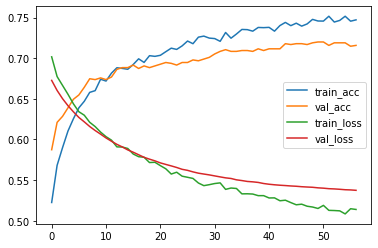


 0.7157894736842105, 0.43367639528840507, 0.7668067226890757, 0.6645569620253164, [[315 159]
 [111 365]] 

Epoch 1/100
268/268 [==============================] - 2s 4ms/step - loss: 0.7100 - accuracy: 0.5130 - val_loss: 0.6842 - val_accuracy: 0.5653
Epoch 2/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6838 - accuracy: 0.5611 - val_loss: 0.6683 - val_accuracy: 0.6021
Epoch 3/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6713 - accuracy: 0.5809 - val_loss: 0.6566 - val_accuracy: 0.6263
Epoch 4/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6590 - accuracy: 0.5993 - val_loss: 0.6467 - val_accuracy: 0.6474
Epoch 5/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6446 - accuracy: 0.6236 - val_loss: 0.6377 - val_accuracy: 0.6632
Epoch 6/100
268/268 [==============================] - 1s 5ms/step - loss: 0.6381 - accuracy: 0.6327 - val_loss: 0.6301 - val_accuracy: 0.6684
Epoch 7/100
268/268 [=============

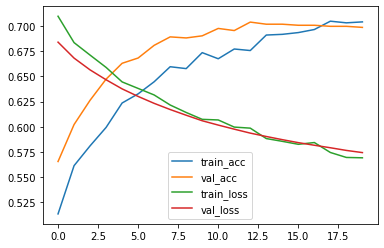


 0.6989473684210527, 0.3971281633331885, 0.7157464212678937, 0.6811279826464208, [[314 147]
 [139 350]] 

Epoch 1/100
268/268 [==============================] - 2s 5ms/step - loss: 0.7019 - accuracy: 0.5279 - val_loss: 0.6735 - val_accuracy: 0.5684
Epoch 2/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6896 - accuracy: 0.5467 - val_loss: 0.6574 - val_accuracy: 0.6326
Epoch 3/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6717 - accuracy: 0.5810 - val_loss: 0.6447 - val_accuracy: 0.6558
Epoch 4/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6631 - accuracy: 0.5946 - val_loss: 0.6335 - val_accuracy: 0.6632
Epoch 5/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6498 - accuracy: 0.6177 - val_loss: 0.6240 - val_accuracy: 0.6621
Epoch 6/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6427 - accuracy: 0.6229 - val_loss: 0.6149 - val_accuracy: 0.6737
Epoch 7/100
268/268 [==============

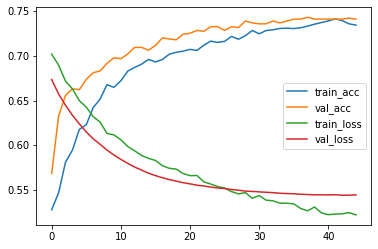


 0.7410526315789474, 0.4832613618727295, 0.7983539094650206, 0.6810344827586207, [[316 148]
 [ 98 388]] 

Epoch 1/100
268/268 [==============================] - 2s 5ms/step - loss: 0.7074 - accuracy: 0.5215 - val_loss: 0.6874 - val_accuracy: 0.5411
Epoch 2/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6875 - accuracy: 0.5561 - val_loss: 0.6716 - val_accuracy: 0.5695
Epoch 3/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6720 - accuracy: 0.5776 - val_loss: 0.6588 - val_accuracy: 0.5979
Epoch 4/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6603 - accuracy: 0.6060 - val_loss: 0.6481 - val_accuracy: 0.6242
Epoch 5/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6466 - accuracy: 0.6217 - val_loss: 0.6392 - val_accuracy: 0.6421
Epoch 6/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6404 - accuracy: 0.6382 - val_loss: 0.6308 - val_accuracy: 0.6432
Epoch 7/100
268/268 [==============

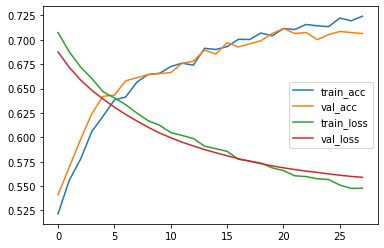


 0.7063157894736842, 0.4126179937497978, 0.7072649572649573, 0.7053941908713693, [[340 142]
 [137 331]] 

Epoch 1/100
268/268 [==============================] - 2s 4ms/step - loss: 0.6982 - accuracy: 0.5337 - val_loss: 0.6728 - val_accuracy: 0.6000
Epoch 2/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6786 - accuracy: 0.5656 - val_loss: 0.6580 - val_accuracy: 0.6347
Epoch 3/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6661 - accuracy: 0.5865 - val_loss: 0.6455 - val_accuracy: 0.6537
Epoch 4/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6546 - accuracy: 0.6166 - val_loss: 0.6347 - val_accuracy: 0.6674
Epoch 5/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6467 - accuracy: 0.6245 - val_loss: 0.6251 - val_accuracy: 0.6747
Epoch 6/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6375 - accuracy: 0.6357 - val_loss: 0.6166 - val_accuracy: 0.6800
Epoch 7/100
268/268 [==============

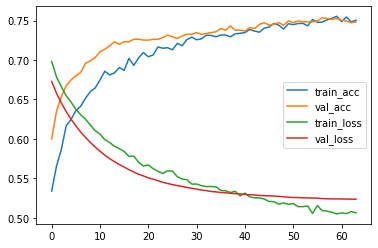


 0.748421052631579, 0.4971135351491099, 0.775, 0.7212765957446808, [[339 131]
 [108 372]] 

Epoch 1/100
268/268 [==============================] - 2s 4ms/step - loss: 0.7030 - accuracy: 0.5252 - val_loss: 0.6762 - val_accuracy: 0.5621
Epoch 2/100
268/268 [==============================] - 1s 5ms/step - loss: 0.6810 - accuracy: 0.5623 - val_loss: 0.6614 - val_accuracy: 0.6074
Epoch 3/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6705 - accuracy: 0.5866 - val_loss: 0.6491 - val_accuracy: 0.6400
Epoch 4/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6534 - accuracy: 0.6164 - val_loss: 0.6379 - val_accuracy: 0.6558
Epoch 5/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6516 - accuracy: 0.6154 - val_loss: 0.6286 - val_accuracy: 0.6632
Epoch 6/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6396 - accuracy: 0.6277 - val_loss: 0.6207 - val_accuracy: 0.6737
Epoch 7/100
268/268 [============================

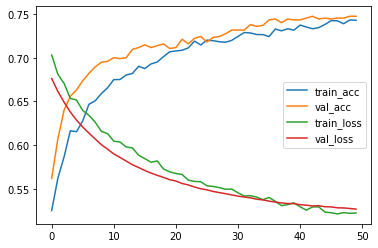


 0.7473684210526316, 0.49424922284193473, 0.7472283813747228, 0.7474949899799599, [[373 126]
 [114 337]] 

Epoch 1/100
268/268 [==============================] - 2s 5ms/step - loss: 0.7021 - accuracy: 0.5284 - val_loss: 0.6773 - val_accuracy: 0.5779
Epoch 2/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6848 - accuracy: 0.5530 - val_loss: 0.6609 - val_accuracy: 0.6147
Epoch 3/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6669 - accuracy: 0.5912 - val_loss: 0.6479 - val_accuracy: 0.6358
Epoch 4/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6506 - accuracy: 0.6135 - val_loss: 0.6372 - val_accuracy: 0.6421
Epoch 5/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6446 - accuracy: 0.6302 - val_loss: 0.6282 - val_accuracy: 0.6526
Epoch 6/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6343 - accuracy: 0.6405 - val_loss: 0.6204 - val_accuracy: 0.6632
Epoch 7/100
268/268 [=============

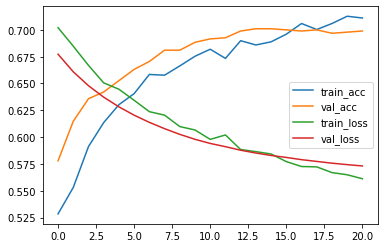


 0.6989473684210527, 0.3977424842801889, 0.7402061855670103, 0.6559139784946236, [[305 160]
 [126 359]] 

Epoch 1/100
268/268 [==============================] - 2s 5ms/step - loss: 0.6985 - accuracy: 0.5297 - val_loss: 0.6720 - val_accuracy: 0.6000
Epoch 2/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6812 - accuracy: 0.5617 - val_loss: 0.6582 - val_accuracy: 0.6295
Epoch 3/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6689 - accuracy: 0.5892 - val_loss: 0.6466 - val_accuracy: 0.6589
Epoch 4/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6554 - accuracy: 0.6117 - val_loss: 0.6365 - val_accuracy: 0.6632
Epoch 5/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6449 - accuracy: 0.6345 - val_loss: 0.6277 - val_accuracy: 0.6737
Epoch 6/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6376 - accuracy: 0.6448 - val_loss: 0.6200 - val_accuracy: 0.6758
Epoch 7/100
268/268 [==============

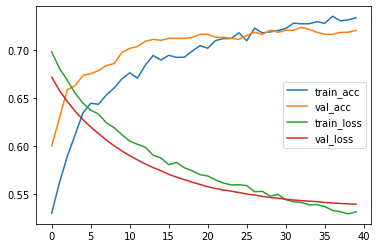


 0.7210526315789474, 0.44420519114484286, 0.7617021276595745, 0.68125, [[327 153]
 [112 358]] 

Epoch 1/100
268/268 [==============================] - 2s 5ms/step - loss: 0.7033 - accuracy: 0.5220 - val_loss: 0.6808 - val_accuracy: 0.5701
Epoch 2/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6866 - accuracy: 0.5522 - val_loss: 0.6663 - val_accuracy: 0.6291
Epoch 3/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6706 - accuracy: 0.5874 - val_loss: 0.6541 - val_accuracy: 0.6523
Epoch 4/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6520 - accuracy: 0.6177 - val_loss: 0.6440 - val_accuracy: 0.6660
Epoch 5/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6475 - accuracy: 0.6180 - val_loss: 0.6355 - val_accuracy: 0.6733
Epoch 6/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6394 - accuracy: 0.6332 - val_loss: 0.6280 - val_accuracy: 0.6754
Epoch 7/100
268/268 [========================

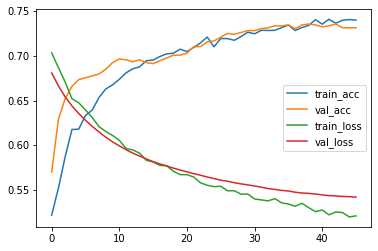


 0.7312961011591148, 0.4637664947768083, 0.7590618336886994, 0.7041666666666667, [[338 142]
 [113 356]] 

Epoch 1/100
268/268 [==============================] - 2s 4ms/step - loss: 0.6959 - accuracy: 0.5419 - val_loss: 0.6730 - val_accuracy: 0.6095
Epoch 2/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6807 - accuracy: 0.5676 - val_loss: 0.6575 - val_accuracy: 0.6495
Epoch 3/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6669 - accuracy: 0.5975 - val_loss: 0.6449 - val_accuracy: 0.6632
Epoch 4/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6543 - accuracy: 0.6136 - val_loss: 0.6338 - val_accuracy: 0.6768
Epoch 5/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6435 - accuracy: 0.6332 - val_loss: 0.6244 - val_accuracy: 0.6842
Epoch 6/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6342 - accuracy: 0.6437 - val_loss: 0.6158 - val_accuracy: 0.6958
Epoch 7/100
268/268 [==============

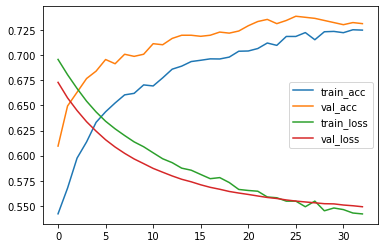


 0.7315789473684211, 0.463022556683628, 0.720682302771855, 0.7422037422037422, [[357 124]
 [131 338]] 

Epoch 1/100
268/268 [==============================] - 2s 4ms/step - loss: 0.7111 - accuracy: 0.5157 - val_loss: 0.6826 - val_accuracy: 0.5589
Epoch 2/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6837 - accuracy: 0.5595 - val_loss: 0.6697 - val_accuracy: 0.5895
Epoch 3/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6723 - accuracy: 0.5807 - val_loss: 0.6581 - val_accuracy: 0.6000
Epoch 4/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6643 - accuracy: 0.5948 - val_loss: 0.6486 - val_accuracy: 0.6242
Epoch 5/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6495 - accuracy: 0.6248 - val_loss: 0.6396 - val_accuracy: 0.6368
Epoch 6/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6384 - accuracy: 0.6326 - val_loss: 0.6324 - val_accuracy: 0.6463
Epoch 7/100
268/268 [================

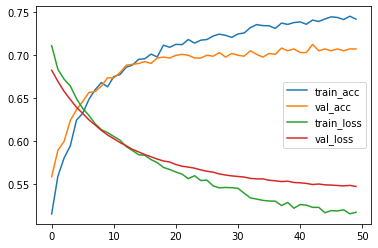


 0.7073684210526315, 0.4134180005468507, 0.7252525252525253, 0.6879120879120879, [[313 142]
 [136 359]] 

Epoch 1/100
268/268 [==============================] - 2s 4ms/step - loss: 0.7140 - accuracy: 0.5063 - val_loss: 0.6893 - val_accuracy: 0.5495
Epoch 2/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6867 - accuracy: 0.5514 - val_loss: 0.6748 - val_accuracy: 0.5926
Epoch 3/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6710 - accuracy: 0.5812 - val_loss: 0.6639 - val_accuracy: 0.6084
Epoch 4/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6596 - accuracy: 0.6050 - val_loss: 0.6551 - val_accuracy: 0.6147
Epoch 5/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6453 - accuracy: 0.6232 - val_loss: 0.6477 - val_accuracy: 0.6316
Epoch 6/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6382 - accuracy: 0.6368 - val_loss: 0.6414 - val_accuracy: 0.6453
Epoch 7/100
268/268 [==============

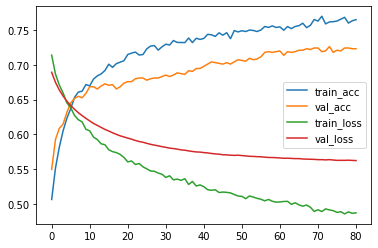


 0.7231578947368421, 0.44768088816553286, 0.7558386411889597, 0.6910229645093946, [[331 148]
 [115 356]] 

Epoch 1/100
268/268 [==============================] - 2s 6ms/step - loss: 0.7118 - accuracy: 0.5053 - val_loss: 0.6786 - val_accuracy: 0.5684
Epoch 2/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6843 - accuracy: 0.5515 - val_loss: 0.6604 - val_accuracy: 0.6147
Epoch 3/100
268/268 [==============================] - 1s 6ms/step - loss: 0.6717 - accuracy: 0.5816 - val_loss: 0.6460 - val_accuracy: 0.6379
Epoch 4/100
268/268 [==============================] - 1s 6ms/step - loss: 0.6591 - accuracy: 0.6063 - val_loss: 0.6346 - val_accuracy: 0.6474
Epoch 5/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6473 - accuracy: 0.6211 - val_loss: 0.6248 - val_accuracy: 0.6568
Epoch 6/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6366 - accuracy: 0.6418 - val_loss: 0.6169 - val_accuracy: 0.6747
Epoch 7/100
268/268 [=============

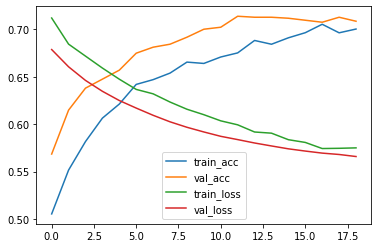


 0.708421052631579, 0.4186153607075655, 0.7473460721868365, 0.6701461377870563, [[321 158]
 [119 352]] 

Epoch 1/100
268/268 [==============================] - 2s 6ms/step - loss: 0.7070 - accuracy: 0.5153 - val_loss: 0.6848 - val_accuracy: 0.5632
Epoch 2/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6878 - accuracy: 0.5557 - val_loss: 0.6699 - val_accuracy: 0.6116
Epoch 3/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6766 - accuracy: 0.5681 - val_loss: 0.6583 - val_accuracy: 0.6284
Epoch 4/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6653 - accuracy: 0.5890 - val_loss: 0.6483 - val_accuracy: 0.6368
Epoch 5/100
268/268 [==============================] - 1s 6ms/step - loss: 0.6508 - accuracy: 0.6182 - val_loss: 0.6391 - val_accuracy: 0.6463
Epoch 6/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6422 - accuracy: 0.6232 - val_loss: 0.6310 - val_accuracy: 0.6611
Epoch 7/100
268/268 [===============

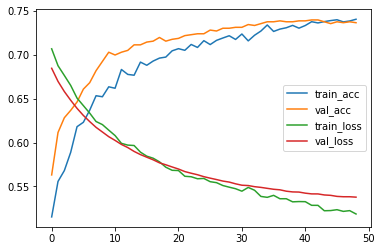


 0.7368421052631579, 0.47322660349821893, 0.7443762781186094, 0.7288503253796096, [[336 125]
 [125 364]] 

Epoch 1/100
268/268 [==============================] - 2s 6ms/step - loss: 0.7232 - accuracy: 0.5157 - val_loss: 0.6916 - val_accuracy: 0.5326
Epoch 2/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6933 - accuracy: 0.5417 - val_loss: 0.6718 - val_accuracy: 0.5958
Epoch 3/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6778 - accuracy: 0.5718 - val_loss: 0.6570 - val_accuracy: 0.6147
Epoch 4/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6589 - accuracy: 0.6063 - val_loss: 0.6437 - val_accuracy: 0.6305
Epoch 5/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6519 - accuracy: 0.6167 - val_loss: 0.6319 - val_accuracy: 0.6537
Epoch 6/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6404 - accuracy: 0.6362 - val_loss: 0.6212 - val_accuracy: 0.6653
Epoch 7/100
268/268 [=============

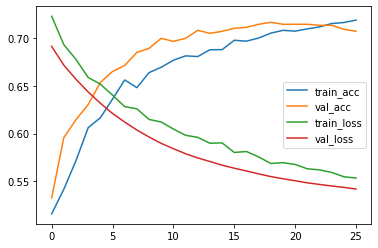


 0.7073684210526315, 0.4154933657019613, 0.7235421166306696, 0.6919917864476386, [[337 150]
 [128 335]] 

Epoch 1/100
268/268 [==============================] - 2s 6ms/step - loss: 0.7099 - accuracy: 0.5128 - val_loss: 0.6811 - val_accuracy: 0.5705
Epoch 2/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6911 - accuracy: 0.5453 - val_loss: 0.6619 - val_accuracy: 0.6368
Epoch 3/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6756 - accuracy: 0.5792 - val_loss: 0.6465 - val_accuracy: 0.6568
Epoch 4/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6584 - accuracy: 0.6057 - val_loss: 0.6332 - val_accuracy: 0.6768
Epoch 5/100
268/268 [==============================] - 1s 6ms/step - loss: 0.6480 - accuracy: 0.6266 - val_loss: 0.6221 - val_accuracy: 0.6789
Epoch 6/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6398 - accuracy: 0.6295 - val_loss: 0.6123 - val_accuracy: 0.6905
Epoch 7/100
268/268 [==============

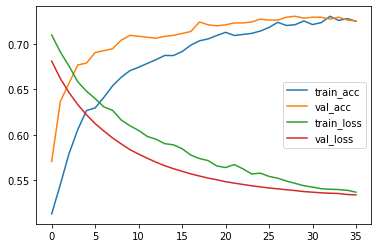


 0.7252631578947368, 0.4505658889064536, 0.7217573221757322, 0.7288135593220338, [[344 128]
 [133 345]] 

Epoch 1/100
268/268 [==============================] - 2s 6ms/step - loss: 0.7088 - accuracy: 0.5137 - val_loss: 0.6841 - val_accuracy: 0.5432
Epoch 2/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6887 - accuracy: 0.5529 - val_loss: 0.6678 - val_accuracy: 0.5926
Epoch 3/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6721 - accuracy: 0.5856 - val_loss: 0.6553 - val_accuracy: 0.6274
Epoch 4/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6597 - accuracy: 0.6092 - val_loss: 0.6446 - val_accuracy: 0.6432
Epoch 5/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6481 - accuracy: 0.6215 - val_loss: 0.6351 - val_accuracy: 0.6526
Epoch 6/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6394 - accuracy: 0.6368 - val_loss: 0.6265 - val_accuracy: 0.6653
Epoch 7/100
268/268 [==============

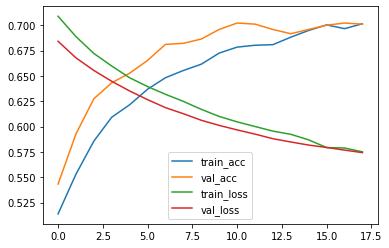


 0.7010526315789474, 0.4039035041005432, 0.7270742358078602, 0.676829268292683, [[333 159]
 [125 333]] 

Epoch 1/100
268/268 [==============================] - 2s 6ms/step - loss: 0.7008 - accuracy: 0.5315 - val_loss: 0.6726 - val_accuracy: 0.6168
Epoch 2/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6824 - accuracy: 0.5573 - val_loss: 0.6571 - val_accuracy: 0.6379
Epoch 3/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6694 - accuracy: 0.5866 - val_loss: 0.6458 - val_accuracy: 0.6495
Epoch 4/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6553 - accuracy: 0.6125 - val_loss: 0.6361 - val_accuracy: 0.6642
Epoch 5/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6495 - accuracy: 0.6188 - val_loss: 0.6275 - val_accuracy: 0.6716
Epoch 6/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6376 - accuracy: 0.6350 - val_loss: 0.6198 - val_accuracy: 0.6821
Epoch 7/100
268/268 [===============

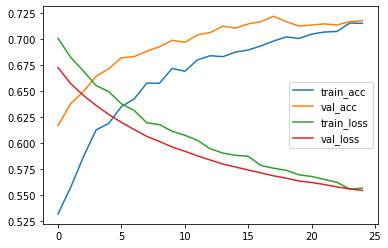


 0.7178947368421053, 0.4340180860817062, 0.7374749498997996, 0.6962305986696231, [[314 137]
 [131 368]] 

Epoch 1/100
268/268 [==============================] - 2s 6ms/step - loss: 0.7046 - accuracy: 0.5196 - val_loss: 0.6802 - val_accuracy: 0.5522
Epoch 2/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6799 - accuracy: 0.5563 - val_loss: 0.6697 - val_accuracy: 0.5901
Epoch 3/100
268/268 [==============================] - 1s 6ms/step - loss: 0.6674 - accuracy: 0.5875 - val_loss: 0.6611 - val_accuracy: 0.6122
Epoch 4/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6528 - accuracy: 0.6094 - val_loss: 0.6528 - val_accuracy: 0.6270
Epoch 5/100
268/268 [==============================] - 1s 6ms/step - loss: 0.6478 - accuracy: 0.6160 - val_loss: 0.6456 - val_accuracy: 0.6322
Epoch 6/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6366 - accuracy: 0.6396 - val_loss: 0.6402 - val_accuracy: 0.6417
Epoch 7/100
268/268 [==============

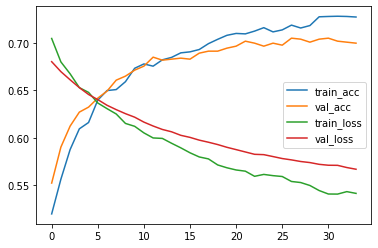


 0.6996838777660696, 0.4010512726431319, 0.7236842105263158, 0.6774847870182555, [[334 159]
 [126 330]] 

Epoch 1/100
268/268 [==============================] - 2s 6ms/step - loss: 0.7076 - accuracy: 0.5225 - val_loss: 0.6691 - val_accuracy: 0.6147
Epoch 2/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6831 - accuracy: 0.5633 - val_loss: 0.6549 - val_accuracy: 0.6368
Epoch 3/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6654 - accuracy: 0.5898 - val_loss: 0.6433 - val_accuracy: 0.6495
Epoch 4/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6553 - accuracy: 0.6122 - val_loss: 0.6333 - val_accuracy: 0.6558
Epoch 5/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6449 - accuracy: 0.6290 - val_loss: 0.6240 - val_accuracy: 0.6684
Epoch 6/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6394 - accuracy: 0.6401 - val_loss: 0.6159 - val_accuracy: 0.6758
Epoch 7/100
268/268 [==============

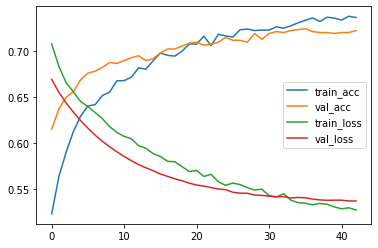


 0.7221052631578947, 0.44653041056452586, 0.7591397849462366, 0.6865979381443299, [[333 152]
 [112 353]] 

Epoch 1/100
268/268 [==============================] - 2s 6ms/step - loss: 0.7042 - accuracy: 0.5232 - val_loss: 0.6836 - val_accuracy: 0.5611
Epoch 2/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6855 - accuracy: 0.5633 - val_loss: 0.6675 - val_accuracy: 0.6242
Epoch 3/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6714 - accuracy: 0.5870 - val_loss: 0.6548 - val_accuracy: 0.6400
Epoch 4/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6575 - accuracy: 0.6080 - val_loss: 0.6444 - val_accuracy: 0.6484
Epoch 5/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6487 - accuracy: 0.6150 - val_loss: 0.6352 - val_accuracy: 0.6653
Epoch 6/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6389 - accuracy: 0.6333 - val_loss: 0.6274 - val_accuracy: 0.6663
Epoch 7/100
268/268 [=============

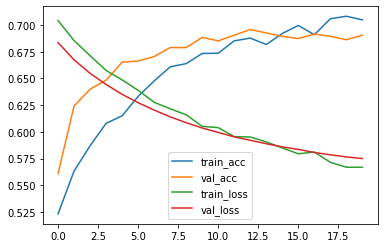


 0.6905263157894737, 0.3820769045794884, 0.7086956521739131, 0.673469387755102, [[330 160]
 [134 326]] 

Epoch 1/100
268/268 [==============================] - 2s 6ms/step - loss: 0.7059 - accuracy: 0.5119 - val_loss: 0.6813 - val_accuracy: 0.5674
Epoch 2/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6889 - accuracy: 0.5497 - val_loss: 0.6676 - val_accuracy: 0.6126
Epoch 3/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6781 - accuracy: 0.5665 - val_loss: 0.6570 - val_accuracy: 0.6421
Epoch 4/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6623 - accuracy: 0.6026 - val_loss: 0.6477 - val_accuracy: 0.6505
Epoch 5/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6502 - accuracy: 0.6146 - val_loss: 0.6394 - val_accuracy: 0.6621
Epoch 6/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6437 - accuracy: 0.6233 - val_loss: 0.6320 - val_accuracy: 0.6632
Epoch 7/100
268/268 [===============

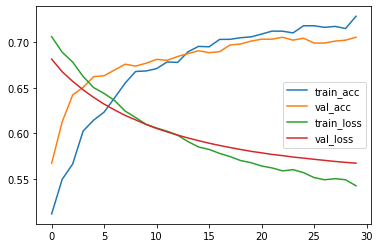


 0.7052631578947368, 0.41102386890215, 0.7161572052401747, 0.6951219512195121, [[342 150]
 [130 328]] 

Epoch 1/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6972 - accuracy: 0.5279 - val_loss: 0.6872 - val_accuracy: 0.5305
Epoch 2/100
268/268 [==============================] - 1s 6ms/step - loss: 0.6845 - accuracy: 0.5560 - val_loss: 0.6746 - val_accuracy: 0.5895
Epoch 3/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6700 - accuracy: 0.5846 - val_loss: 0.6638 - val_accuracy: 0.6253
Epoch 4/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6561 - accuracy: 0.6091 - val_loss: 0.6543 - val_accuracy: 0.6337
Epoch 5/100
268/268 [==============================] - 1s 6ms/step - loss: 0.6451 - accuracy: 0.6291 - val_loss: 0.6466 - val_accuracy: 0.6379
Epoch 6/100
268/268 [==============================] - 1s 6ms/step - loss: 0.6374 - accuracy: 0.6431 - val_loss: 0.6395 - val_accuracy: 0.6442
Epoch 7/100
268/268 [================

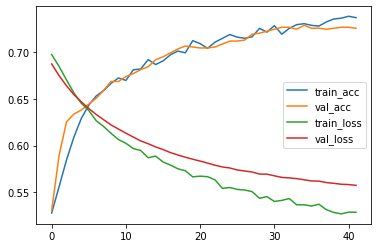


 0.7252631578947368, 0.45360153476377435, 0.7770700636942676, 0.6743215031315241, [[323 156]
 [105 366]] 

Epoch 1/100
268/268 [==============================] - 2s 6ms/step - loss: 0.7003 - accuracy: 0.5219 - val_loss: 0.6794 - val_accuracy: 0.5726
Epoch 2/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6840 - accuracy: 0.5526 - val_loss: 0.6645 - val_accuracy: 0.6179
Epoch 3/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6696 - accuracy: 0.5880 - val_loss: 0.6515 - val_accuracy: 0.6484
Epoch 4/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6613 - accuracy: 0.6011 - val_loss: 0.6408 - val_accuracy: 0.6579
Epoch 5/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6471 - accuracy: 0.6284 - val_loss: 0.6317 - val_accuracy: 0.6505
Epoch 6/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6391 - accuracy: 0.6395 - val_loss: 0.6229 - val_accuracy: 0.6621
Epoch 7/100
268/268 [=============

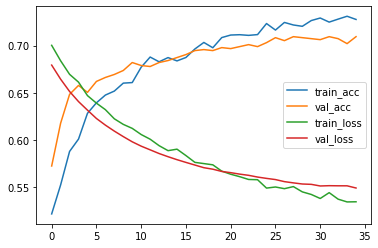


 0.7094736842105264, 0.42109569144164444, 0.7429805615550756, 0.6776180698151951, [[330 157]
 [119 344]] 

Epoch 1/100
268/268 [==============================] - 2s 6ms/step - loss: 0.7077 - accuracy: 0.5206 - val_loss: 0.6804 - val_accuracy: 0.5653
Epoch 2/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6892 - accuracy: 0.5504 - val_loss: 0.6654 - val_accuracy: 0.6074
Epoch 3/100
268/268 [==============================] - 1s 6ms/step - loss: 0.6657 - accuracy: 0.5947 - val_loss: 0.6532 - val_accuracy: 0.6263
Epoch 4/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6582 - accuracy: 0.6070 - val_loss: 0.6438 - val_accuracy: 0.6316
Epoch 5/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6427 - accuracy: 0.6218 - val_loss: 0.6358 - val_accuracy: 0.6400
Epoch 6/100
268/268 [==============================] - 1s 6ms/step - loss: 0.6362 - accuracy: 0.6372 - val_loss: 0.6289 - val_accuracy: 0.6484
Epoch 7/100
268/268 [=============

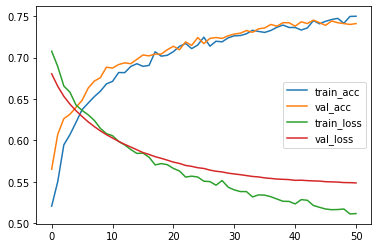


 0.7410526315789474, 0.48194108622129994, 0.7711340206185567, 0.7096774193548387, [[330 135]
 [111 374]] 

Epoch 1/100
268/268 [==============================] - 2s 6ms/step - loss: 0.7075 - accuracy: 0.5177 - val_loss: 0.6814 - val_accuracy: 0.5632
Epoch 2/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6864 - accuracy: 0.5525 - val_loss: 0.6632 - val_accuracy: 0.6253
Epoch 3/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6727 - accuracy: 0.5832 - val_loss: 0.6503 - val_accuracy: 0.6347
Epoch 4/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6602 - accuracy: 0.5985 - val_loss: 0.6392 - val_accuracy: 0.6432
Epoch 5/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6491 - accuracy: 0.6183 - val_loss: 0.6301 - val_accuracy: 0.6526
Epoch 6/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6390 - accuracy: 0.6325 - val_loss: 0.6224 - val_accuracy: 0.6547
Epoch 7/100
268/268 [=============

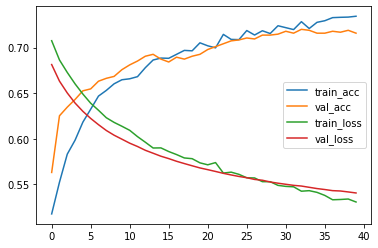


 0.7157894736842105, 0.4308946286529861, 0.7459016393442623, 0.683982683982684, [[316 146]
 [124 364]] 

Epoch 1/100
268/268 [==============================] - 2s 6ms/step - loss: 0.7061 - accuracy: 0.5240 - val_loss: 0.6752 - val_accuracy: 0.5863
Epoch 2/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6809 - accuracy: 0.5573 - val_loss: 0.6617 - val_accuracy: 0.6305
Epoch 3/100
268/268 [==============================] - 1s 6ms/step - loss: 0.6693 - accuracy: 0.5876 - val_loss: 0.6509 - val_accuracy: 0.6516
Epoch 4/100
268/268 [==============================] - 1s 6ms/step - loss: 0.6632 - accuracy: 0.5982 - val_loss: 0.6414 - val_accuracy: 0.6621
Epoch 5/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6465 - accuracy: 0.6207 - val_loss: 0.6333 - val_accuracy: 0.6642
Epoch 6/100
268/268 [==============================] - 1s 6ms/step - loss: 0.6373 - accuracy: 0.6310 - val_loss: 0.6259 - val_accuracy: 0.6695
Epoch 7/100
268/268 [===============

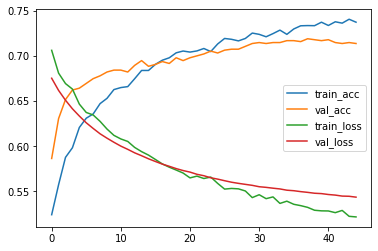


 0.7136842105263158, 0.4278708930979774, 0.7286324786324786, 0.6991701244813278, [[337 145]
 [127 341]] 

Epoch 1/100
268/268 [==============================] - 2s 6ms/step - loss: 0.7077 - accuracy: 0.5066 - val_loss: 0.6803 - val_accuracy: 0.5632
Epoch 2/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6846 - accuracy: 0.5571 - val_loss: 0.6627 - val_accuracy: 0.6063
Epoch 3/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6694 - accuracy: 0.5887 - val_loss: 0.6486 - val_accuracy: 0.6368
Epoch 4/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6550 - accuracy: 0.6069 - val_loss: 0.6366 - val_accuracy: 0.6537
Epoch 5/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6435 - accuracy: 0.6193 - val_loss: 0.6269 - val_accuracy: 0.6726
Epoch 6/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6349 - accuracy: 0.6386 - val_loss: 0.6187 - val_accuracy: 0.6947
Epoch 7/100
268/268 [==============

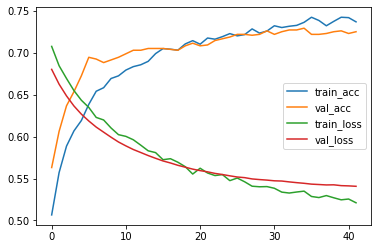


 0.7252631578947368, 0.4488656269316567, 0.7540322580645161, 0.6938325991189427, [[315 139]
 [122 374]] 

Epoch 1/100
268/268 [==============================] - 2s 6ms/step - loss: 0.7147 - accuracy: 0.5039 - val_loss: 0.6841 - val_accuracy: 0.5501
Epoch 2/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6913 - accuracy: 0.5455 - val_loss: 0.6658 - val_accuracy: 0.5996
Epoch 3/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6763 - accuracy: 0.5708 - val_loss: 0.6513 - val_accuracy: 0.6270
Epoch 4/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6697 - accuracy: 0.5887 - val_loss: 0.6395 - val_accuracy: 0.6481
Epoch 5/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6558 - accuracy: 0.6082 - val_loss: 0.6289 - val_accuracy: 0.6723
Epoch 6/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6461 - accuracy: 0.6298 - val_loss: 0.6200 - val_accuracy: 0.6818
Epoch 7/100
268/268 [==============

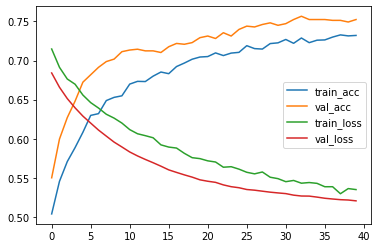


 0.7523709167544784, 0.5036899765116397, 0.7656565656565657, 0.737885462555066, [[335 119]
 [116 379]] 

Epoch 1/100
268/268 [==============================] - 2s 6ms/step - loss: 0.7069 - accuracy: 0.5128 - val_loss: 0.6765 - val_accuracy: 0.5800
Epoch 2/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6844 - accuracy: 0.5644 - val_loss: 0.6597 - val_accuracy: 0.6316
Epoch 3/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6716 - accuracy: 0.5811 - val_loss: 0.6459 - val_accuracy: 0.6558
Epoch 4/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6586 - accuracy: 0.6091 - val_loss: 0.6341 - val_accuracy: 0.6642
Epoch 5/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6494 - accuracy: 0.6238 - val_loss: 0.6236 - val_accuracy: 0.6853
Epoch 6/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6423 - accuracy: 0.6306 - val_loss: 0.6145 - val_accuracy: 0.6989
Epoch 7/100
268/268 [===============

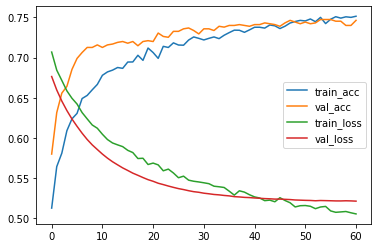


 0.7463157894736843, 0.493456298283275, 0.7908902691511387, 0.7002141327623126, [[327 140]
 [101 382]] 

Epoch 1/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6974 - accuracy: 0.5311 - val_loss: 0.6762 - val_accuracy: 0.5853
Epoch 2/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6774 - accuracy: 0.5753 - val_loss: 0.6626 - val_accuracy: 0.6168
Epoch 3/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6639 - accuracy: 0.5941 - val_loss: 0.6515 - val_accuracy: 0.6358
Epoch 4/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6519 - accuracy: 0.6175 - val_loss: 0.6427 - val_accuracy: 0.6400
Epoch 5/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6370 - accuracy: 0.6410 - val_loss: 0.6346 - val_accuracy: 0.6474
Epoch 6/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6299 - accuracy: 0.6524 - val_loss: 0.6273 - val_accuracy: 0.6600
Epoch 7/100
268/268 [===============

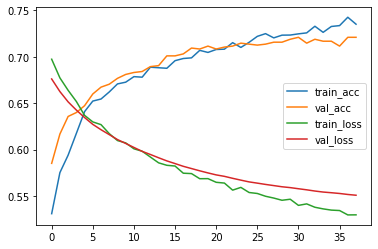


 0.7210526315789474, 0.4417924531898203, 0.7118279569892473, 0.7298969072164948, [[354 131]
 [134 331]] 

Epoch 1/100
268/268 [==============================] - 2s 6ms/step - loss: 0.7064 - accuracy: 0.5176 - val_loss: 0.6757 - val_accuracy: 0.5916
Epoch 2/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6861 - accuracy: 0.5498 - val_loss: 0.6599 - val_accuracy: 0.6305
Epoch 3/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6707 - accuracy: 0.5778 - val_loss: 0.6462 - val_accuracy: 0.6547
Epoch 4/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6621 - accuracy: 0.5976 - val_loss: 0.6346 - val_accuracy: 0.6789
Epoch 5/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6479 - accuracy: 0.6205 - val_loss: 0.6237 - val_accuracy: 0.6853
Epoch 6/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6409 - accuracy: 0.6328 - val_loss: 0.6142 - val_accuracy: 0.6989
Epoch 7/100
268/268 [==============

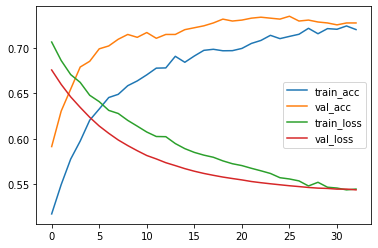


 0.7273684210526316, 0.4572346697836554, 0.7650862068965517, 0.691358024691358, [[336 150]
 [109 355]] 

Epoch 1/100
268/268 [==============================] - 2s 6ms/step - loss: 0.7055 - accuracy: 0.5163 - val_loss: 0.6832 - val_accuracy: 0.5642
Epoch 2/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6877 - accuracy: 0.5530 - val_loss: 0.6676 - val_accuracy: 0.5968
Epoch 3/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6720 - accuracy: 0.5851 - val_loss: 0.6552 - val_accuracy: 0.6242
Epoch 4/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6623 - accuracy: 0.5971 - val_loss: 0.6446 - val_accuracy: 0.6442
Epoch 5/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6501 - accuracy: 0.6197 - val_loss: 0.6347 - val_accuracy: 0.6558
Epoch 6/100
268/268 [==============================] - 1s 6ms/step - loss: 0.6388 - accuracy: 0.6363 - val_loss: 0.6260 - val_accuracy: 0.6621
Epoch 7/100
268/268 [===============

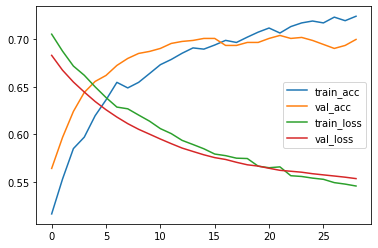


 0.7, 0.40143863533137375, 0.7262931034482759, 0.6748971193415638, [[328 158]
 [127 337]] 

Epoch 1/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6958 - accuracy: 0.5378 - val_loss: 0.6716 - val_accuracy: 0.5979
Epoch 2/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6795 - accuracy: 0.5760 - val_loss: 0.6560 - val_accuracy: 0.6347
Epoch 3/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6664 - accuracy: 0.5843 - val_loss: 0.6435 - val_accuracy: 0.6505
Epoch 4/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6533 - accuracy: 0.6120 - val_loss: 0.6337 - val_accuracy: 0.6653
Epoch 5/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6486 - accuracy: 0.6265 - val_loss: 0.6242 - val_accuracy: 0.6758
Epoch 6/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6398 - accuracy: 0.6310 - val_loss: 0.6161 - val_accuracy: 0.6895
Epoch 7/100
268/268 [============================

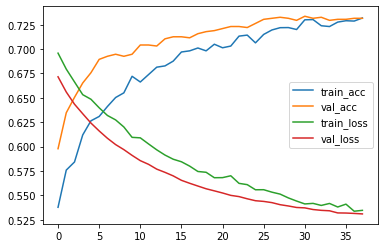


 0.7315789473684211, 0.46329814795301355, 0.7259713701431493, 0.737527114967462, [[340 121]
 [134 355]] 

Epoch 1/100
268/268 [==============================] - 2s 6ms/step - loss: 0.7082 - accuracy: 0.5074 - val_loss: 0.6815 - val_accuracy: 0.5568
Epoch 2/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6870 - accuracy: 0.5505 - val_loss: 0.6665 - val_accuracy: 0.6063
Epoch 3/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6713 - accuracy: 0.5761 - val_loss: 0.6542 - val_accuracy: 0.6253
Epoch 4/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6626 - accuracy: 0.5970 - val_loss: 0.6442 - val_accuracy: 0.6400
Epoch 5/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6489 - accuracy: 0.6186 - val_loss: 0.6348 - val_accuracy: 0.6568
Epoch 6/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6396 - accuracy: 0.6317 - val_loss: 0.6267 - val_accuracy: 0.6632
Epoch 7/100
268/268 [==============

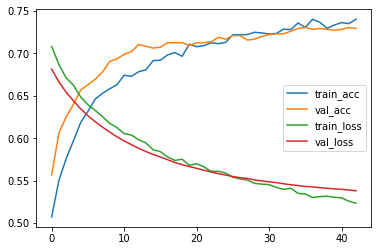


 0.7294736842105263, 0.45833419610087406, 0.7236842105263158, 0.7348178137651822, [[363 131]
 [126 330]] 

Epoch 1/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6987 - accuracy: 0.5257 - val_loss: 0.6848 - val_accuracy: 0.5621
Epoch 2/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6810 - accuracy: 0.5639 - val_loss: 0.6724 - val_accuracy: 0.6011
Epoch 3/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6629 - accuracy: 0.5975 - val_loss: 0.6623 - val_accuracy: 0.6137
Epoch 4/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6532 - accuracy: 0.6092 - val_loss: 0.6539 - val_accuracy: 0.6253
Epoch 5/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6448 - accuracy: 0.6271 - val_loss: 0.6463 - val_accuracy: 0.6326
Epoch 6/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6338 - accuracy: 0.6423 - val_loss: 0.6393 - val_accuracy: 0.6368
Epoch 7/100
268/268 [=============

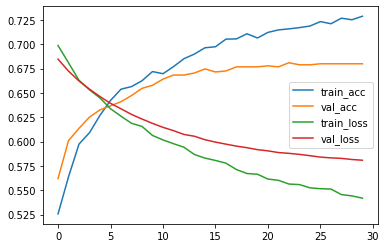


 0.68, 0.3619494412473763, 0.7272727272727273, 0.6331236897274634, [[302 175]
 [129 344]] 

Epoch 1/100
268/268 [==============================] - 2s 6ms/step - loss: 0.7040 - accuracy: 0.5175 - val_loss: 0.6803 - val_accuracy: 0.5789
Epoch 2/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6866 - accuracy: 0.5504 - val_loss: 0.6639 - val_accuracy: 0.6158
Epoch 3/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6749 - accuracy: 0.5794 - val_loss: 0.6502 - val_accuracy: 0.6526
Epoch 4/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6625 - accuracy: 0.5952 - val_loss: 0.6384 - val_accuracy: 0.6568
Epoch 5/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6523 - accuracy: 0.6118 - val_loss: 0.6281 - val_accuracy: 0.6632
Epoch 6/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6410 - accuracy: 0.6343 - val_loss: 0.6187 - val_accuracy: 0.6726
Epoch 7/100
268/268 [============================

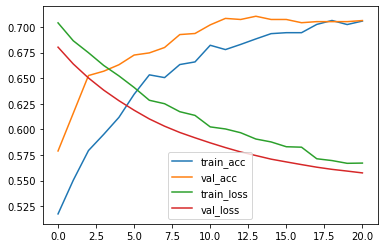


 0.7063157894736842, 0.41441006240791484, 0.777319587628866, 0.632258064516129, [[294 171]
 [108 377]] 

Epoch 1/100
268/268 [==============================] - 2s 6ms/step - loss: 0.7098 - accuracy: 0.5142 - val_loss: 0.6846 - val_accuracy: 0.5474
Epoch 2/100
268/268 [==============================] - 1s 6ms/step - loss: 0.6915 - accuracy: 0.5408 - val_loss: 0.6726 - val_accuracy: 0.5884
Epoch 3/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6751 - accuracy: 0.5750 - val_loss: 0.6623 - val_accuracy: 0.6126
Epoch 4/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6626 - accuracy: 0.5985 - val_loss: 0.6537 - val_accuracy: 0.6221
Epoch 5/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6547 - accuracy: 0.6120 - val_loss: 0.6460 - val_accuracy: 0.6368
Epoch 6/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6486 - accuracy: 0.6196 - val_loss: 0.6396 - val_accuracy: 0.6505
Epoch 7/100
268/268 [===============

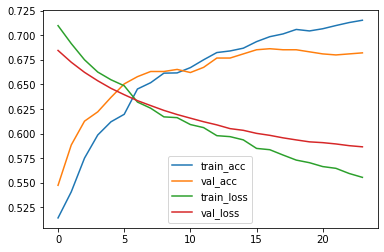


 0.6821052631578948, 0.3634500217113218, 0.6824457593688363, 0.6817155756207675, [[302 141]
 [161 346]] 

Epoch 1/100
268/268 [==============================] - 2s 6ms/step - loss: 0.7063 - accuracy: 0.5137 - val_loss: 0.6778 - val_accuracy: 0.5785
Epoch 2/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6890 - accuracy: 0.5546 - val_loss: 0.6632 - val_accuracy: 0.6365
Epoch 3/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6699 - accuracy: 0.5887 - val_loss: 0.6519 - val_accuracy: 0.6365
Epoch 4/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6584 - accuracy: 0.6084 - val_loss: 0.6425 - val_accuracy: 0.6491
Epoch 5/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6498 - accuracy: 0.6243 - val_loss: 0.6342 - val_accuracy: 0.6565
Epoch 6/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6434 - accuracy: 0.6295 - val_loss: 0.6272 - val_accuracy: 0.6617
Epoch 7/100
268/268 [==============

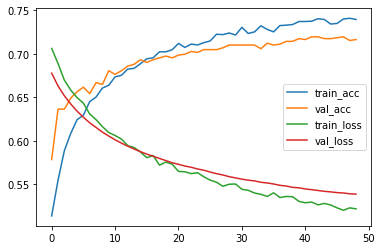


 0.7165437302423604, 0.43625112106636293, 0.7602591792656588, 0.6748971193415638, [[328 158]
 [111 352]] 

Epoch 1/100
268/268 [==============================] - 2s 6ms/step - loss: 0.7102 - accuracy: 0.5085 - val_loss: 0.6825 - val_accuracy: 0.5674
Epoch 2/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6858 - accuracy: 0.5470 - val_loss: 0.6693 - val_accuracy: 0.5979
Epoch 3/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6741 - accuracy: 0.5730 - val_loss: 0.6592 - val_accuracy: 0.6147
Epoch 4/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6597 - accuracy: 0.6008 - val_loss: 0.6510 - val_accuracy: 0.6242
Epoch 5/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6516 - accuracy: 0.6113 - val_loss: 0.6441 - val_accuracy: 0.6400
Epoch 6/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6398 - accuracy: 0.6302 - val_loss: 0.6377 - val_accuracy: 0.6474
Epoch 7/100
268/268 [=============

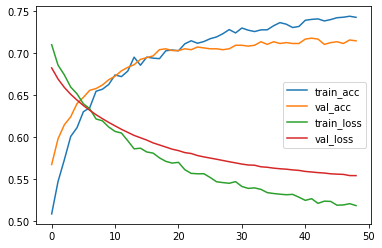


 0.7147368421052631, 0.429863169547051, 0.7242888402625821, 0.7058823529411765, [[348 145]
 [126 331]] 

Epoch 1/100
268/268 [==============================] - 2s 6ms/step - loss: 0.7077 - accuracy: 0.5077 - val_loss: 0.6781 - val_accuracy: 0.5653
Epoch 2/100
268/268 [==============================] - 1s 6ms/step - loss: 0.6874 - accuracy: 0.5438 - val_loss: 0.6629 - val_accuracy: 0.6021
Epoch 3/100
268/268 [==============================] - 1s 6ms/step - loss: 0.6717 - accuracy: 0.5846 - val_loss: 0.6511 - val_accuracy: 0.6253
Epoch 4/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6622 - accuracy: 0.5970 - val_loss: 0.6411 - val_accuracy: 0.6411
Epoch 5/100
268/268 [==============================] - 1s 5ms/step - loss: 0.6521 - accuracy: 0.6163 - val_loss: 0.6323 - val_accuracy: 0.6537
Epoch 6/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6416 - accuracy: 0.6276 - val_loss: 0.6241 - val_accuracy: 0.6621
Epoch 7/100
268/268 [===============

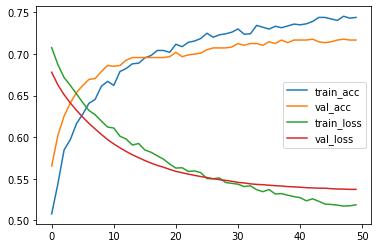


 0.716842105263158, 0.4332583605684201, 0.7535934291581109, 0.6781857451403888, [[314 149]
 [120 367]] 

Epoch 1/100
268/268 [==============================] - 2s 6ms/step - loss: 0.7131 - accuracy: 0.5135 - val_loss: 0.6862 - val_accuracy: 0.5463
Epoch 2/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6915 - accuracy: 0.5432 - val_loss: 0.6707 - val_accuracy: 0.5884
Epoch 3/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6711 - accuracy: 0.5908 - val_loss: 0.6588 - val_accuracy: 0.6242
Epoch 4/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6588 - accuracy: 0.6019 - val_loss: 0.6490 - val_accuracy: 0.6411
Epoch 5/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6470 - accuracy: 0.6243 - val_loss: 0.6408 - val_accuracy: 0.6453
Epoch 6/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6424 - accuracy: 0.6307 - val_loss: 0.6340 - val_accuracy: 0.6516
Epoch 7/100
268/268 [===============

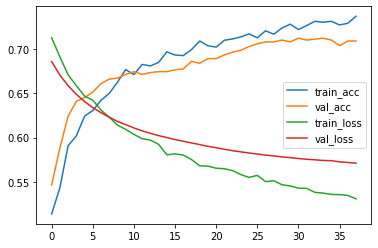


 0.7094736842105264, 0.4189510821313152, 0.7103594080338267, 0.7085953878406709, [[338 139]
 [137 336]] 

Epoch 1/100
268/268 [==============================] - 2s 6ms/step - loss: 0.7108 - accuracy: 0.5128 - val_loss: 0.6863 - val_accuracy: 0.5632
Epoch 2/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6912 - accuracy: 0.5485 - val_loss: 0.6710 - val_accuracy: 0.5947
Epoch 3/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6772 - accuracy: 0.5739 - val_loss: 0.6578 - val_accuracy: 0.6253
Epoch 4/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6700 - accuracy: 0.5831 - val_loss: 0.6461 - val_accuracy: 0.6505
Epoch 5/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6575 - accuracy: 0.6058 - val_loss: 0.6363 - val_accuracy: 0.6589
Epoch 6/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6457 - accuracy: 0.6209 - val_loss: 0.6276 - val_accuracy: 0.6758
Epoch 7/100
268/268 [==============

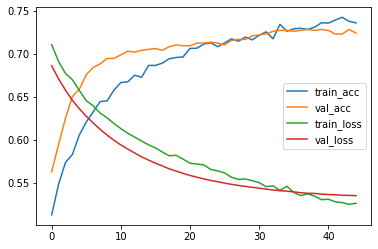


 0.7242105263157895, 0.4480145462713325, 0.7530864197530864, 0.6939655172413793, [[322 142]
 [120 366]] 

Epoch 1/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6991 - accuracy: 0.5343 - val_loss: 0.6722 - val_accuracy: 0.6021
Epoch 2/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6844 - accuracy: 0.5561 - val_loss: 0.6561 - val_accuracy: 0.6347
Epoch 3/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6688 - accuracy: 0.5938 - val_loss: 0.6436 - val_accuracy: 0.6589
Epoch 4/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6563 - accuracy: 0.6106 - val_loss: 0.6335 - val_accuracy: 0.6642
Epoch 5/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6477 - accuracy: 0.6205 - val_loss: 0.6244 - val_accuracy: 0.6747
Epoch 6/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6371 - accuracy: 0.6400 - val_loss: 0.6171 - val_accuracy: 0.6726
Epoch 7/100
268/268 [==============

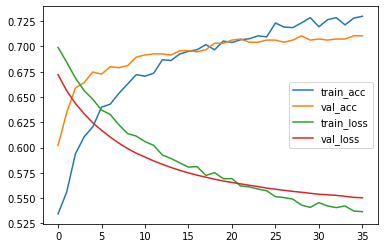


 0.7105263157894737, 0.421512973848404, 0.7288135593220338, 0.6924686192468619, [[331 147]
 [128 344]] 

Epoch 1/100
268/268 [==============================] - 2s 6ms/step - loss: 0.7091 - accuracy: 0.5070 - val_loss: 0.6835 - val_accuracy: 0.5526
Epoch 2/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6891 - accuracy: 0.5506 - val_loss: 0.6679 - val_accuracy: 0.5979
Epoch 3/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6777 - accuracy: 0.5726 - val_loss: 0.6558 - val_accuracy: 0.6284
Epoch 4/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6654 - accuracy: 0.5945 - val_loss: 0.6457 - val_accuracy: 0.6526
Epoch 5/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6521 - accuracy: 0.6111 - val_loss: 0.6369 - val_accuracy: 0.6600
Epoch 6/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6421 - accuracy: 0.6262 - val_loss: 0.6294 - val_accuracy: 0.6705
Epoch 7/100
268/268 [===============

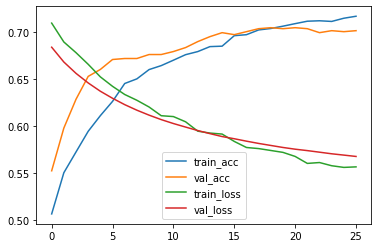


 0.7010526315789474, 0.4034810939658681, 0.7221006564551422, 0.6815415821501014, [[336 157]
 [127 330]] 

Epoch 1/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6987 - accuracy: 0.5251 - val_loss: 0.6751 - val_accuracy: 0.5937
Epoch 2/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6828 - accuracy: 0.5549 - val_loss: 0.6592 - val_accuracy: 0.6421
Epoch 3/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6682 - accuracy: 0.5886 - val_loss: 0.6462 - val_accuracy: 0.6653
Epoch 4/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6587 - accuracy: 0.6030 - val_loss: 0.6351 - val_accuracy: 0.6747
Epoch 5/100
268/268 [==============================] - 1s 6ms/step - loss: 0.6452 - accuracy: 0.6287 - val_loss: 0.6251 - val_accuracy: 0.6789
Epoch 6/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6404 - accuracy: 0.6273 - val_loss: 0.6165 - val_accuracy: 0.6832
Epoch 7/100
268/268 [==============

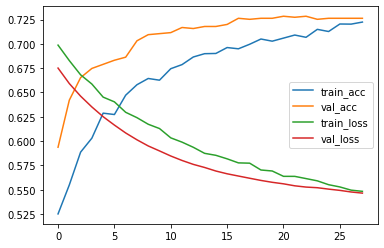


 0.7263157894736842, 0.45399457160335493, 0.7466960352422908, 0.7076612903225806, [[351 145]
 [115 339]] 

Epoch 1/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6903 - accuracy: 0.5498 - val_loss: 0.6672 - val_accuracy: 0.6253
Epoch 2/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6781 - accuracy: 0.5721 - val_loss: 0.6518 - val_accuracy: 0.6432
Epoch 3/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6618 - accuracy: 0.6005 - val_loss: 0.6393 - val_accuracy: 0.6547
Epoch 4/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6554 - accuracy: 0.6131 - val_loss: 0.6284 - val_accuracy: 0.6632
Epoch 5/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6425 - accuracy: 0.6274 - val_loss: 0.6193 - val_accuracy: 0.6800
Epoch 6/100
268/268 [==============================] - 1s 6ms/step - loss: 0.6375 - accuracy: 0.6341 - val_loss: 0.6113 - val_accuracy: 0.6747
Epoch 7/100
268/268 [=============

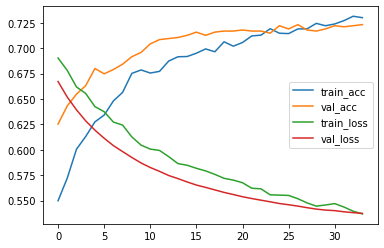


 0.7231578947368421, 0.4463246913291539, 0.7217573221757322, 0.7245762711864406, [[342 130]
 [133 345]] 

Epoch 1/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6949 - accuracy: 0.5337 - val_loss: 0.6720 - val_accuracy: 0.6053
Epoch 2/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6779 - accuracy: 0.5645 - val_loss: 0.6563 - val_accuracy: 0.6537
Epoch 3/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6633 - accuracy: 0.5969 - val_loss: 0.6435 - val_accuracy: 0.6726
Epoch 4/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6516 - accuracy: 0.6219 - val_loss: 0.6315 - val_accuracy: 0.6789
Epoch 5/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6428 - accuracy: 0.6305 - val_loss: 0.6210 - val_accuracy: 0.6895
Epoch 6/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6372 - accuracy: 0.6373 - val_loss: 0.6120 - val_accuracy: 0.7000
Epoch 7/100
268/268 [==============

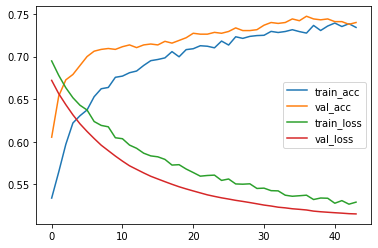


 0.74, 0.478396640983949, 0.804, 0.6688888888888889, [[301 149]
 [ 98 402]] 

Epoch 1/100
268/268 [==============================] - 2s 6ms/step - loss: 0.7199 - accuracy: 0.5098 - val_loss: 0.6806 - val_accuracy: 0.5564
Epoch 2/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6934 - accuracy: 0.5419 - val_loss: 0.6673 - val_accuracy: 0.6101
Epoch 3/100
268/268 [==============================] - 1s 6ms/step - loss: 0.6788 - accuracy: 0.5724 - val_loss: 0.6566 - val_accuracy: 0.6354
Epoch 4/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6667 - accuracy: 0.5913 - val_loss: 0.6462 - val_accuracy: 0.6565
Epoch 5/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6510 - accuracy: 0.6178 - val_loss: 0.6371 - val_accuracy: 0.6596
Epoch 6/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6412 - accuracy: 0.6326 - val_loss: 0.6289 - val_accuracy: 0.6744
Epoch 7/100
268/268 [==============================] - 2s 6ms/s

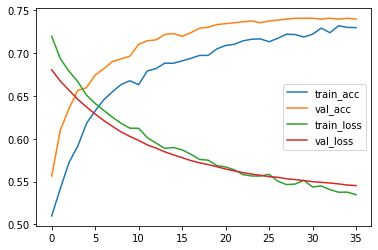


 0.7397260273972602, 0.4791021424546582, 0.7505154639175258, 0.728448275862069, [[338 126]
 [121 364]] 

Epoch 1/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6995 - accuracy: 0.5290 - val_loss: 0.6834 - val_accuracy: 0.5547
Epoch 2/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6802 - accuracy: 0.5616 - val_loss: 0.6713 - val_accuracy: 0.5747
Epoch 3/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6675 - accuracy: 0.5912 - val_loss: 0.6617 - val_accuracy: 0.5926
Epoch 4/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6515 - accuracy: 0.6127 - val_loss: 0.6542 - val_accuracy: 0.5947
Epoch 5/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6396 - accuracy: 0.6319 - val_loss: 0.6472 - val_accuracy: 0.6042
Epoch 6/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6325 - accuracy: 0.6451 - val_loss: 0.6419 - val_accuracy: 0.6105
Epoch 7/100
268/268 [===============

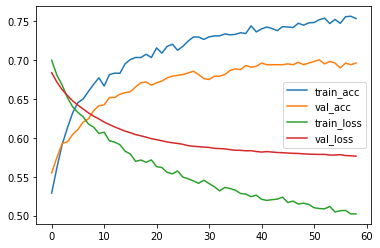


 0.6957894736842105, 0.3957032233180837, 0.7600849256900213, 0.6325678496868476, [[303 176]
 [113 358]] 

Epoch 1/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6962 - accuracy: 0.5319 - val_loss: 0.6768 - val_accuracy: 0.5621
Epoch 2/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6808 - accuracy: 0.5622 - val_loss: 0.6641 - val_accuracy: 0.5937
Epoch 3/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6653 - accuracy: 0.5915 - val_loss: 0.6533 - val_accuracy: 0.6126
Epoch 4/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6495 - accuracy: 0.6183 - val_loss: 0.6446 - val_accuracy: 0.6274
Epoch 5/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6453 - accuracy: 0.6171 - val_loss: 0.6372 - val_accuracy: 0.6263
Epoch 6/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6361 - accuracy: 0.6400 - val_loss: 0.6301 - val_accuracy: 0.6432
Epoch 7/100
268/268 [==============

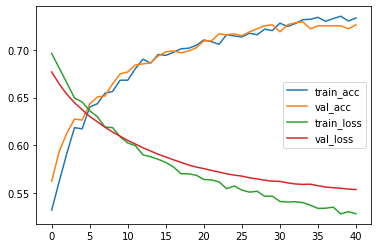


 0.7263157894736842, 0.4561285164742681, 0.7777777777777778, 0.6763485477178424, [[326 156]
 [104 364]] 

Epoch 1/100
268/268 [==============================] - 2s 6ms/step - loss: 0.7036 - accuracy: 0.5339 - val_loss: 0.6796 - val_accuracy: 0.5526
Epoch 2/100
268/268 [==============================] - 1s 6ms/step - loss: 0.6771 - accuracy: 0.5727 - val_loss: 0.6615 - val_accuracy: 0.5916
Epoch 3/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6656 - accuracy: 0.5994 - val_loss: 0.6480 - val_accuracy: 0.6116
Epoch 4/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6513 - accuracy: 0.6138 - val_loss: 0.6361 - val_accuracy: 0.6432
Epoch 5/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6418 - accuracy: 0.6320 - val_loss: 0.6266 - val_accuracy: 0.6484
Epoch 6/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6339 - accuracy: 0.6448 - val_loss: 0.6187 - val_accuracy: 0.6600
Epoch 7/100
268/268 [==============

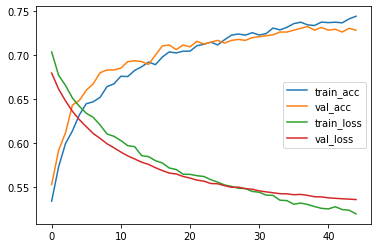


 0.728421052631579, 0.45942945942945945, 0.7604395604395604, 0.6989898989898989, [[346 149]
 [109 346]] 

Epoch 1/100
268/268 [==============================] - 2s 6ms/step - loss: 0.7007 - accuracy: 0.5306 - val_loss: 0.6771 - val_accuracy: 0.5695
Epoch 2/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6886 - accuracy: 0.5603 - val_loss: 0.6608 - val_accuracy: 0.6221
Epoch 3/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6697 - accuracy: 0.5877 - val_loss: 0.6470 - val_accuracy: 0.6411
Epoch 4/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6581 - accuracy: 0.6073 - val_loss: 0.6361 - val_accuracy: 0.6579
Epoch 5/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6447 - accuracy: 0.6239 - val_loss: 0.6271 - val_accuracy: 0.6632
Epoch 6/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6412 - accuracy: 0.6338 - val_loss: 0.6197 - val_accuracy: 0.6705
Epoch 7/100
268/268 [==============

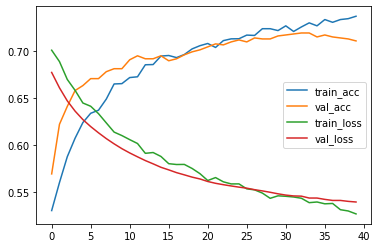


 0.7105263157894737, 0.4208972207055542, 0.710204081632653, 0.7108695652173913, [[327 133]
 [142 348]] 

Epoch 1/100
268/268 [==============================] - 2s 6ms/step - loss: 0.7011 - accuracy: 0.5320 - val_loss: 0.6735 - val_accuracy: 0.5842
Epoch 2/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6806 - accuracy: 0.5591 - val_loss: 0.6551 - val_accuracy: 0.6484
Epoch 3/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6661 - accuracy: 0.5967 - val_loss: 0.6402 - val_accuracy: 0.6716
Epoch 4/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6521 - accuracy: 0.6134 - val_loss: 0.6275 - val_accuracy: 0.6832
Epoch 5/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6441 - accuracy: 0.6274 - val_loss: 0.6169 - val_accuracy: 0.6905
Epoch 6/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6367 - accuracy: 0.6366 - val_loss: 0.6078 - val_accuracy: 0.6979
Epoch 7/100
268/268 [===============

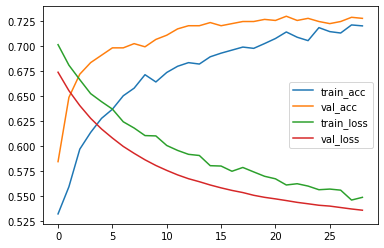


 0.7273684210526316, 0.45470813198890997, 0.7531120331950207, 0.7008547008547008, [[328 140]
 [119 363]] 

Epoch 1/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6997 - accuracy: 0.5201 - val_loss: 0.6791 - val_accuracy: 0.5958
Epoch 2/100
268/268 [==============================] - 1s 6ms/step - loss: 0.6826 - accuracy: 0.5535 - val_loss: 0.6649 - val_accuracy: 0.6253
Epoch 3/100
268/268 [==============================] - 1s 6ms/step - loss: 0.6711 - accuracy: 0.5879 - val_loss: 0.6532 - val_accuracy: 0.6516
Epoch 4/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6600 - accuracy: 0.6018 - val_loss: 0.6427 - val_accuracy: 0.6547
Epoch 5/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6481 - accuracy: 0.6251 - val_loss: 0.6336 - val_accuracy: 0.6589
Epoch 6/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6379 - accuracy: 0.6370 - val_loss: 0.6257 - val_accuracy: 0.6632
Epoch 7/100
268/268 [=============

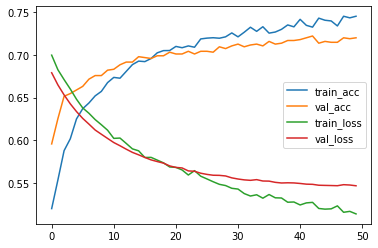


 0.72, 0.4363022328953765, 0.7355212355212355, 0.7013888888888888, [[303 129]
 [137 381]] 

Epoch 1/100
268/268 [==============================] - 2s 6ms/step - loss: 0.7086 - accuracy: 0.5224 - val_loss: 0.6774 - val_accuracy: 0.5789
Epoch 2/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6828 - accuracy: 0.5578 - val_loss: 0.6638 - val_accuracy: 0.6158
Epoch 3/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6701 - accuracy: 0.5854 - val_loss: 0.6529 - val_accuracy: 0.6326
Epoch 4/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6570 - accuracy: 0.6043 - val_loss: 0.6442 - val_accuracy: 0.6421
Epoch 5/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6484 - accuracy: 0.6216 - val_loss: 0.6366 - val_accuracy: 0.6558
Epoch 6/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6365 - accuracy: 0.6356 - val_loss: 0.6298 - val_accuracy: 0.6663
Epoch 7/100
268/268 [============================

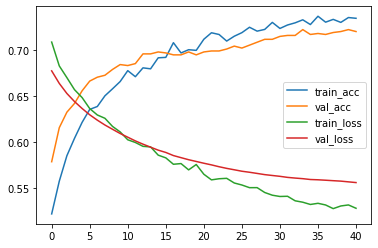


 0.72, 0.44101607605524207, 0.7671517671517671, 0.6716417910447762, [[315 154]
 [112 369]] 

Epoch 1/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6944 - accuracy: 0.5387 - val_loss: 0.6676 - val_accuracy: 0.6053
Epoch 2/100
268/268 [==============================] - 1s 6ms/step - loss: 0.6807 - accuracy: 0.5712 - val_loss: 0.6531 - val_accuracy: 0.6295
Epoch 3/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6657 - accuracy: 0.5946 - val_loss: 0.6405 - val_accuracy: 0.6579
Epoch 4/100
268/268 [==============================] - 1s 6ms/step - loss: 0.6515 - accuracy: 0.6176 - val_loss: 0.6294 - val_accuracy: 0.6695
Epoch 5/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6415 - accuracy: 0.6320 - val_loss: 0.6197 - val_accuracy: 0.6811
Epoch 6/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6358 - accuracy: 0.6380 - val_loss: 0.6116 - val_accuracy: 0.6853
Epoch 7/100
268/268 [===========================

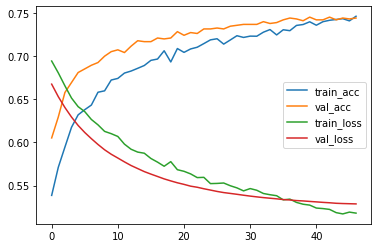


 0.7442105263157894, 0.49015094289362604, 0.7737068965517241, 0.7160493827160493, [[348 138]
 [105 359]] 

Epoch 1/100
268/268 [==============================] - 2s 6ms/step - loss: 0.7158 - accuracy: 0.5194 - val_loss: 0.6813 - val_accuracy: 0.5632
Epoch 2/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6910 - accuracy: 0.5464 - val_loss: 0.6649 - val_accuracy: 0.6116
Epoch 3/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6738 - accuracy: 0.5754 - val_loss: 0.6518 - val_accuracy: 0.6284
Epoch 4/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6633 - accuracy: 0.5961 - val_loss: 0.6409 - val_accuracy: 0.6442
Epoch 5/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6480 - accuracy: 0.6211 - val_loss: 0.6316 - val_accuracy: 0.6463
Epoch 6/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6420 - accuracy: 0.6276 - val_loss: 0.6230 - val_accuracy: 0.6621
Epoch 7/100
268/268 [=============

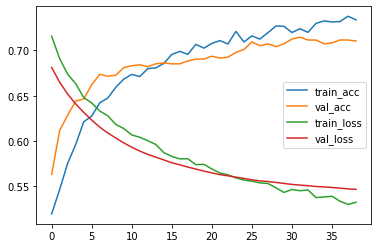


 0.7105263157894737, 0.421302755324087, 0.721868365180467, 0.6993736951983298, [[335 144]
 [131 340]] 

Epoch 1/100
268/268 [==============================] - 2s 6ms/step - loss: 0.7100 - accuracy: 0.5159 - val_loss: 0.6718 - val_accuracy: 0.6101
Epoch 2/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6867 - accuracy: 0.5506 - val_loss: 0.6590 - val_accuracy: 0.6344
Epoch 3/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6694 - accuracy: 0.5891 - val_loss: 0.6472 - val_accuracy: 0.6428
Epoch 4/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6629 - accuracy: 0.5946 - val_loss: 0.6377 - val_accuracy: 0.6544
Epoch 5/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6463 - accuracy: 0.6242 - val_loss: 0.6293 - val_accuracy: 0.6670
Epoch 6/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6395 - accuracy: 0.6357 - val_loss: 0.6210 - val_accuracy: 0.6681
Epoch 7/100
268/268 [================

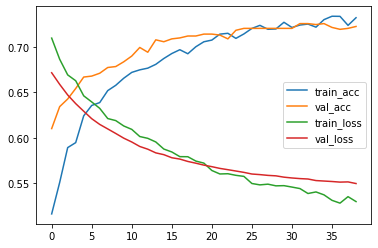


 0.7228661749209695, 0.4461000385498129, 0.732739420935412, 0.714, [[357 143]
 [120 329]] 

Epoch 1/100
268/268 [==============================] - 2s 6ms/step - loss: 0.7035 - accuracy: 0.5232 - val_loss: 0.6856 - val_accuracy: 0.5747
Epoch 2/100
268/268 [==============================] - 1s 6ms/step - loss: 0.6861 - accuracy: 0.5615 - val_loss: 0.6732 - val_accuracy: 0.5989
Epoch 3/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6716 - accuracy: 0.5850 - val_loss: 0.6627 - val_accuracy: 0.6084
Epoch 4/100
268/268 [==============================] - 1s 6ms/step - loss: 0.6575 - accuracy: 0.6038 - val_loss: 0.6528 - val_accuracy: 0.6221
Epoch 5/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6471 - accuracy: 0.6221 - val_loss: 0.6448 - val_accuracy: 0.6368
Epoch 6/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6358 - accuracy: 0.6372 - val_loss: 0.6370 - val_accuracy: 0.6463
Epoch 7/100
268/268 [============================

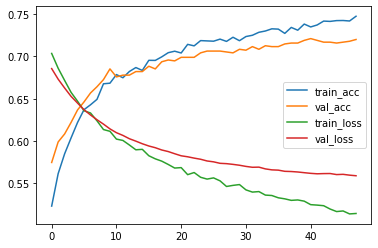


 0.72, 0.4395950732345739, 0.720620842572062, 0.7194388777555111, [[359 140]
 [126 325]] 

Epoch 1/100
268/268 [==============================] - 2s 6ms/step - loss: 0.7051 - accuracy: 0.5157 - val_loss: 0.6831 - val_accuracy: 0.5568
Epoch 2/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6910 - accuracy: 0.5447 - val_loss: 0.6686 - val_accuracy: 0.5863
Epoch 3/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6737 - accuracy: 0.5816 - val_loss: 0.6561 - val_accuracy: 0.6095
Epoch 4/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6642 - accuracy: 0.5946 - val_loss: 0.6458 - val_accuracy: 0.6263
Epoch 5/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6529 - accuracy: 0.6134 - val_loss: 0.6371 - val_accuracy: 0.6347
Epoch 6/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6450 - accuracy: 0.6276 - val_loss: 0.6295 - val_accuracy: 0.6421
Epoch 7/100
268/268 [=============================

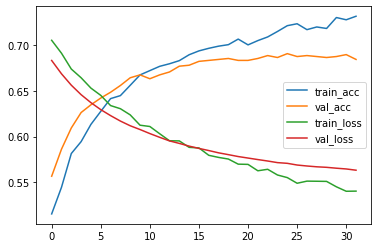


 0.6842105263157895, 0.3683111467232886, 0.7089397089397089, 0.6588486140724946, [[309 160]
 [140 341]] 

Epoch 1/100
268/268 [==============================] - 2s 6ms/step - loss: 0.7109 - accuracy: 0.4936 - val_loss: 0.6842 - val_accuracy: 0.5632
Epoch 2/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6869 - accuracy: 0.5404 - val_loss: 0.6675 - val_accuracy: 0.6200
Epoch 3/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6755 - accuracy: 0.5776 - val_loss: 0.6546 - val_accuracy: 0.6326
Epoch 4/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6600 - accuracy: 0.6071 - val_loss: 0.6435 - val_accuracy: 0.6453
Epoch 5/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6467 - accuracy: 0.6256 - val_loss: 0.6338 - val_accuracy: 0.6558
Epoch 6/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6430 - accuracy: 0.6315 - val_loss: 0.6260 - val_accuracy: 0.6642
Epoch 7/100
268/268 [==============

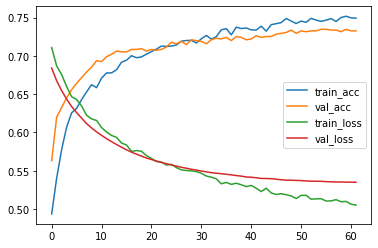


 0.7326315789473684, 0.465755679201708, 0.7615062761506276, 0.7033898305084746, [[332 140]
 [114 364]] 

Epoch 1/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6969 - accuracy: 0.5311 - val_loss: 0.6792 - val_accuracy: 0.5716
Epoch 2/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6822 - accuracy: 0.5618 - val_loss: 0.6650 - val_accuracy: 0.6105
Epoch 3/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6633 - accuracy: 0.5975 - val_loss: 0.6534 - val_accuracy: 0.6316
Epoch 4/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6556 - accuracy: 0.6023 - val_loss: 0.6442 - val_accuracy: 0.6474
Epoch 5/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6459 - accuracy: 0.6221 - val_loss: 0.6354 - val_accuracy: 0.6611
Epoch 6/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6335 - accuracy: 0.6381 - val_loss: 0.6283 - val_accuracy: 0.6726
Epoch 7/100
268/268 [===============

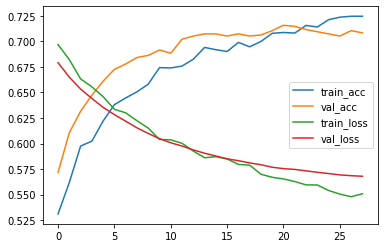


 0.708421052631579, 0.4158552836800844, 0.736734693877551, 0.6782608695652174, [[312 148]
 [129 361]] 

Epoch 1/100
268/268 [==============================] - 2s 6ms/step - loss: 0.7028 - accuracy: 0.5201 - val_loss: 0.6773 - val_accuracy: 0.5737
Epoch 2/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6826 - accuracy: 0.5626 - val_loss: 0.6625 - val_accuracy: 0.6263
Epoch 3/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6685 - accuracy: 0.5904 - val_loss: 0.6507 - val_accuracy: 0.6284
Epoch 4/100
268/268 [==============================] - 1s 6ms/step - loss: 0.6583 - accuracy: 0.6073 - val_loss: 0.6406 - val_accuracy: 0.6347
Epoch 5/100
268/268 [==============================] - 1s 5ms/step - loss: 0.6464 - accuracy: 0.6225 - val_loss: 0.6319 - val_accuracy: 0.6484
Epoch 6/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6396 - accuracy: 0.6326 - val_loss: 0.6239 - val_accuracy: 0.6611
Epoch 7/100
268/268 [================

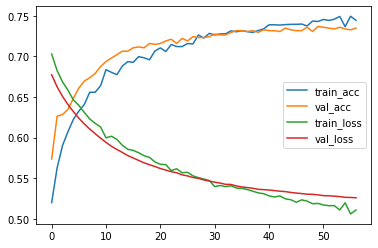


 0.7347368421052631, 0.46968703497305025, 0.7457627118644068, 0.7238493723849372, [[346 132]
 [120 352]] 

Epoch 1/100
268/268 [==============================] - 2s 6ms/step - loss: 0.7146 - accuracy: 0.4988 - val_loss: 0.6882 - val_accuracy: 0.5368
Epoch 2/100
268/268 [==============================] - 1s 6ms/step - loss: 0.6927 - accuracy: 0.5374 - val_loss: 0.6724 - val_accuracy: 0.5905
Epoch 3/100
268/268 [==============================] - 1s 6ms/step - loss: 0.6745 - accuracy: 0.5728 - val_loss: 0.6600 - val_accuracy: 0.6189
Epoch 4/100
268/268 [==============================] - 1s 6ms/step - loss: 0.6634 - accuracy: 0.6002 - val_loss: 0.6492 - val_accuracy: 0.6400
Epoch 5/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6538 - accuracy: 0.6150 - val_loss: 0.6401 - val_accuracy: 0.6442
Epoch 6/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6457 - accuracy: 0.6326 - val_loss: 0.6322 - val_accuracy: 0.6516
Epoch 7/100
268/268 [=============

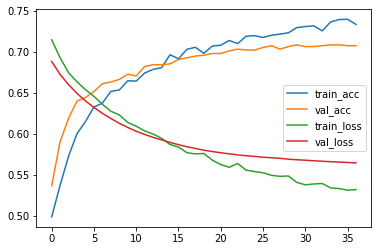


 0.7073684210526315, 0.41548614483658597, 0.7394957983193278, 0.6751054852320675, [[320 154]
 [124 352]] 

Epoch 1/100
268/268 [==============================] - 2s 6ms/step - loss: 0.7038 - accuracy: 0.5206 - val_loss: 0.6740 - val_accuracy: 0.5853
Epoch 2/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6811 - accuracy: 0.5570 - val_loss: 0.6555 - val_accuracy: 0.6463
Epoch 3/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6672 - accuracy: 0.5859 - val_loss: 0.6409 - val_accuracy: 0.6547
Epoch 4/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6520 - accuracy: 0.6122 - val_loss: 0.6287 - val_accuracy: 0.6663
Epoch 5/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6431 - accuracy: 0.6288 - val_loss: 0.6185 - val_accuracy: 0.6800
Epoch 6/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6336 - accuracy: 0.6419 - val_loss: 0.6091 - val_accuracy: 0.6853
Epoch 7/100
268/268 [=============

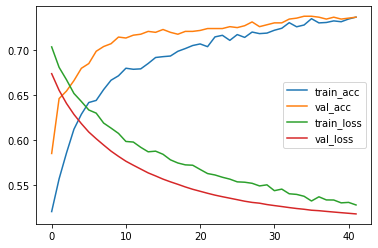


 0.7368421052631579, 0.475642156586636, 0.7805907172995781, 0.6932773109243697, [[330 146]
 [104 370]] 

Epoch 1/100
268/268 [==============================] - 2s 6ms/step - loss: 0.7121 - accuracy: 0.5123 - val_loss: 0.6818 - val_accuracy: 0.5674
Epoch 2/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6949 - accuracy: 0.5388 - val_loss: 0.6681 - val_accuracy: 0.6032
Epoch 3/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6776 - accuracy: 0.5735 - val_loss: 0.6570 - val_accuracy: 0.6295
Epoch 4/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6646 - accuracy: 0.5961 - val_loss: 0.6477 - val_accuracy: 0.6389
Epoch 5/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6555 - accuracy: 0.6148 - val_loss: 0.6400 - val_accuracy: 0.6547
Epoch 6/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6428 - accuracy: 0.6276 - val_loss: 0.6330 - val_accuracy: 0.6621
Epoch 7/100
268/268 [===============

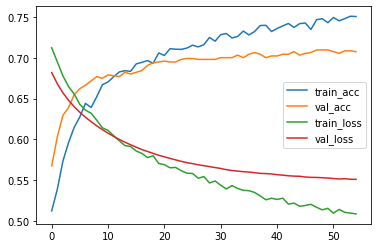


 0.7073684210526315, 0.41476652511101125, 0.7190775681341719, 0.6955602536997886, [[329 144]
 [134 343]] 

Epoch 1/100
268/268 [==============================] - 2s 6ms/step - loss: 0.7163 - accuracy: 0.5097 - val_loss: 0.6856 - val_accuracy: 0.5537
Epoch 2/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6936 - accuracy: 0.5403 - val_loss: 0.6674 - val_accuracy: 0.5926
Epoch 3/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6806 - accuracy: 0.5694 - val_loss: 0.6529 - val_accuracy: 0.6211
Epoch 4/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6630 - accuracy: 0.6009 - val_loss: 0.6403 - val_accuracy: 0.6474
Epoch 5/100
268/268 [==============================] - 1s 6ms/step - loss: 0.6559 - accuracy: 0.6077 - val_loss: 0.6296 - val_accuracy: 0.6526
Epoch 6/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6457 - accuracy: 0.6278 - val_loss: 0.6202 - val_accuracy: 0.6600
Epoch 7/100
268/268 [=============

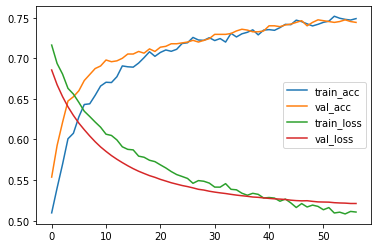


 0.7442105263157894, 0.48881225898395025, 0.7642105263157895, 0.7242105263157895, [[344 131]
 [112 363]] 

Epoch 1/100
268/268 [==============================] - 2s 6ms/step - loss: 0.7001 - accuracy: 0.5283 - val_loss: 0.6748 - val_accuracy: 0.6017
Epoch 2/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6814 - accuracy: 0.5630 - val_loss: 0.6594 - val_accuracy: 0.6354
Epoch 3/100
268/268 [==============================] - 1s 6ms/step - loss: 0.6685 - accuracy: 0.5864 - val_loss: 0.6471 - val_accuracy: 0.6407
Epoch 4/100
268/268 [==============================] - 1s 6ms/step - loss: 0.6551 - accuracy: 0.6096 - val_loss: 0.6368 - val_accuracy: 0.6607
Epoch 5/100
268/268 [==============================] - 1s 6ms/step - loss: 0.6446 - accuracy: 0.6196 - val_loss: 0.6273 - val_accuracy: 0.6617
Epoch 6/100
268/268 [==============================] - 1s 6ms/step - loss: 0.6411 - accuracy: 0.6301 - val_loss: 0.6193 - val_accuracy: 0.6628
Epoch 7/100
268/268 [=============

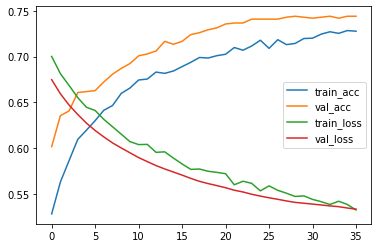


 0.743940990516333, 0.48932950196576774, 0.783157894736842, 0.7046413502109705, [[334 140]
 [103 372]] 

Epoch 1/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6998 - accuracy: 0.5329 - val_loss: 0.6732 - val_accuracy: 0.5947
Epoch 2/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6796 - accuracy: 0.5646 - val_loss: 0.6584 - val_accuracy: 0.6358
Epoch 3/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6628 - accuracy: 0.6010 - val_loss: 0.6464 - val_accuracy: 0.6537
Epoch 4/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6517 - accuracy: 0.6142 - val_loss: 0.6360 - val_accuracy: 0.6600
Epoch 5/100
268/268 [==============================] - 1s 6ms/step - loss: 0.6425 - accuracy: 0.6287 - val_loss: 0.6275 - val_accuracy: 0.6705
Epoch 6/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6339 - accuracy: 0.6412 - val_loss: 0.6193 - val_accuracy: 0.6800
Epoch 7/100
268/268 [===============

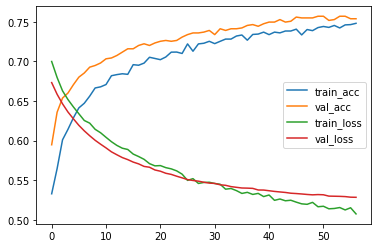


 0.7536842105263157, 0.510856840886347, 0.7943107221006565, 0.716024340770791, [[353 140]
 [ 94 363]] 

Epoch 1/100
268/268 [==============================] - 2s 6ms/step - loss: 0.7059 - accuracy: 0.5098 - val_loss: 0.6872 - val_accuracy: 0.5411
Epoch 2/100
268/268 [==============================] - 1s 6ms/step - loss: 0.6913 - accuracy: 0.5453 - val_loss: 0.6725 - val_accuracy: 0.5989
Epoch 3/100
268/268 [==============================] - 1s 6ms/step - loss: 0.6769 - accuracy: 0.5711 - val_loss: 0.6609 - val_accuracy: 0.6232
Epoch 4/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6692 - accuracy: 0.5921 - val_loss: 0.6505 - val_accuracy: 0.6547
Epoch 5/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6565 - accuracy: 0.6188 - val_loss: 0.6412 - val_accuracy: 0.6663
Epoch 6/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6485 - accuracy: 0.6249 - val_loss: 0.6326 - val_accuracy: 0.6811
Epoch 7/100
268/268 [================

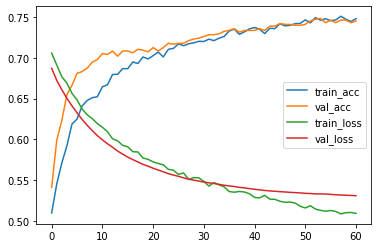


 0.7452631578947368, 0.49141835010100865, 0.7711864406779662, 0.7196652719665272, [[344 134]
 [108 364]] 

Epoch 1/100
268/268 [==============================] - 2s 6ms/step - loss: 0.7015 - accuracy: 0.5202 - val_loss: 0.6761 - val_accuracy: 0.6116
Epoch 2/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6920 - accuracy: 0.5424 - val_loss: 0.6617 - val_accuracy: 0.6253
Epoch 3/100
268/268 [==============================] - 1s 6ms/step - loss: 0.6732 - accuracy: 0.5789 - val_loss: 0.6507 - val_accuracy: 0.6484
Epoch 4/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6626 - accuracy: 0.5952 - val_loss: 0.6409 - val_accuracy: 0.6516
Epoch 5/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6522 - accuracy: 0.6108 - val_loss: 0.6324 - val_accuracy: 0.6663
Epoch 6/100
268/268 [==============================] - 2s 6ms/step - loss: 0.6419 - accuracy: 0.6354 - val_loss: 0.6248 - val_accuracy: 0.6684
Epoch 7/100
268/268 [=============

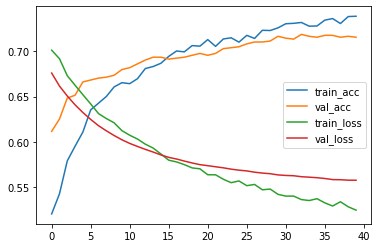


 0.7157894736842105, 0.4348807937917276, 0.767590618336887, 0.6652806652806653, [[320 161]
 [109 360]] 

Epoch 1/100
268/268 [==============================] - 2s 5ms/step - loss: 0.7072 - accuracy: 0.5202 - val_loss: 0.6789 - val_accuracy: 0.5758
Epoch 2/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6853 - accuracy: 0.5540 - val_loss: 0.6620 - val_accuracy: 0.6221
Epoch 3/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6683 - accuracy: 0.5902 - val_loss: 0.6486 - val_accuracy: 0.6453
Epoch 4/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6585 - accuracy: 0.6093 - val_loss: 0.6363 - val_accuracy: 0.6642
Epoch 5/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6456 - accuracy: 0.6240 - val_loss: 0.6268 - val_accuracy: 0.6663
Epoch 6/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6391 - accuracy: 0.6343 - val_loss: 0.6179 - val_accuracy: 0.6674
Epoch 7/100
268/268 [===============

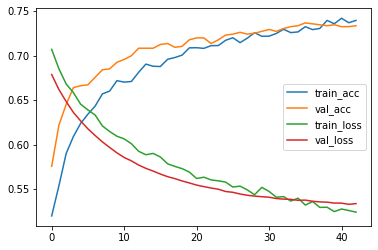


 0.7336842105263158, 0.46853994244402103, 0.714867617107943, 0.7538126361655774, [[346 113]
 [140 351]] 

Epoch 1/100
268/268 [==============================] - 2s 5ms/step - loss: 0.7057 - accuracy: 0.5116 - val_loss: 0.6825 - val_accuracy: 0.5463
Epoch 2/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6871 - accuracy: 0.5464 - val_loss: 0.6660 - val_accuracy: 0.6221
Epoch 3/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6773 - accuracy: 0.5732 - val_loss: 0.6537 - val_accuracy: 0.6442
Epoch 4/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6622 - accuracy: 0.5952 - val_loss: 0.6431 - val_accuracy: 0.6568
Epoch 5/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6507 - accuracy: 0.6166 - val_loss: 0.6331 - val_accuracy: 0.6653
Epoch 6/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6409 - accuracy: 0.6311 - val_loss: 0.6245 - val_accuracy: 0.6737
Epoch 7/100
268/268 [==============

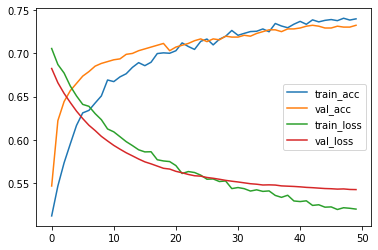


 0.7326315789473684, 0.4631056521846039, 0.7715430861723447, 0.6895787139689579, [[311 140]
 [114 385]] 

Epoch 1/100
268/268 [==============================] - 2s 4ms/step - loss: 0.6957 - accuracy: 0.5370 - val_loss: 0.6800 - val_accuracy: 0.5779
Epoch 2/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6811 - accuracy: 0.5617 - val_loss: 0.6675 - val_accuracy: 0.6032
Epoch 3/100
268/268 [==============================] - 1s 5ms/step - loss: 0.6650 - accuracy: 0.5984 - val_loss: 0.6573 - val_accuracy: 0.6284
Epoch 4/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6575 - accuracy: 0.6062 - val_loss: 0.6488 - val_accuracy: 0.6263
Epoch 5/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6415 - accuracy: 0.6334 - val_loss: 0.6412 - val_accuracy: 0.6411
Epoch 6/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6302 - accuracy: 0.6499 - val_loss: 0.6346 - val_accuracy: 0.6389
Epoch 7/100
268/268 [==============

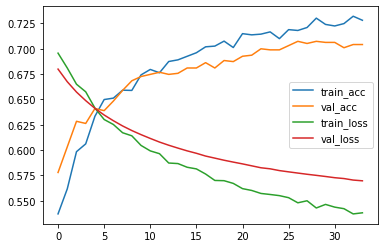


 0.7042105263157895, 0.40907752641337647, 0.7222222222222222, 0.6867219917012448, [[331 151]
 [130 338]] 

Epoch 1/100
268/268 [==============================] - 2s 5ms/step - loss: 0.6940 - accuracy: 0.5424 - val_loss: 0.6691 - val_accuracy: 0.5832
Epoch 2/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6743 - accuracy: 0.5797 - val_loss: 0.6525 - val_accuracy: 0.6189
Epoch 3/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6580 - accuracy: 0.6105 - val_loss: 0.6395 - val_accuracy: 0.6463
Epoch 4/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6502 - accuracy: 0.6145 - val_loss: 0.6285 - val_accuracy: 0.6516
Epoch 5/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6378 - accuracy: 0.6374 - val_loss: 0.6188 - val_accuracy: 0.6653
Epoch 6/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6321 - accuracy: 0.6379 - val_loss: 0.6104 - val_accuracy: 0.6779
Epoch 7/100
268/268 [=============

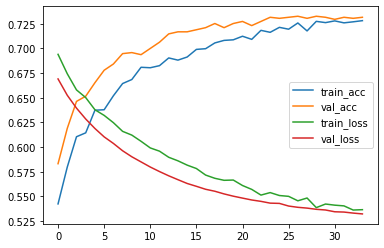


 0.7315789473684211, 0.46641829688140884, 0.7794432548179872, 0.6853002070393375, [[331 152]
 [103 364]] 

Epoch 1/100
268/268 [==============================] - 2s 5ms/step - loss: 0.7207 - accuracy: 0.4933 - val_loss: 0.6870 - val_accuracy: 0.5579
Epoch 2/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6959 - accuracy: 0.5373 - val_loss: 0.6689 - val_accuracy: 0.6305
Epoch 3/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6781 - accuracy: 0.5705 - val_loss: 0.6550 - val_accuracy: 0.6600
Epoch 4/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6644 - accuracy: 0.6004 - val_loss: 0.6432 - val_accuracy: 0.6737
Epoch 5/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6548 - accuracy: 0.6117 - val_loss: 0.6334 - val_accuracy: 0.6884
Epoch 6/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6443 - accuracy: 0.6348 - val_loss: 0.6250 - val_accuracy: 0.6916
Epoch 7/100
268/268 [=============

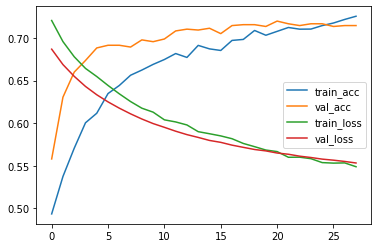


 0.7147368421052631, 0.4304485390203144, 0.7326086956521739, 0.6979591836734694, [[342 148]
 [123 337]] 

Epoch 1/100
268/268 [==============================] - 2s 5ms/step - loss: 0.6994 - accuracy: 0.5328 - val_loss: 0.6819 - val_accuracy: 0.5716
Epoch 2/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6819 - accuracy: 0.5631 - val_loss: 0.6685 - val_accuracy: 0.5937
Epoch 3/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6706 - accuracy: 0.5860 - val_loss: 0.6578 - val_accuracy: 0.6274
Epoch 4/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6578 - accuracy: 0.6073 - val_loss: 0.6488 - val_accuracy: 0.6411
Epoch 5/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6520 - accuracy: 0.6201 - val_loss: 0.6412 - val_accuracy: 0.6432
Epoch 6/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6399 - accuracy: 0.6320 - val_loss: 0.6342 - val_accuracy: 0.6411
Epoch 7/100
268/268 [==============

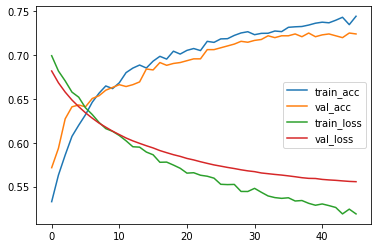


 0.7242105263157895, 0.4484357715247787, 0.7145877378435518, 0.7337526205450734, [[350 127]
 [135 338]] 

Epoch 1/100
268/268 [==============================] - 2s 5ms/step - loss: 0.7057 - accuracy: 0.5246 - val_loss: 0.6814 - val_accuracy: 0.5774
Epoch 2/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6838 - accuracy: 0.5606 - val_loss: 0.6675 - val_accuracy: 0.6006
Epoch 3/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6692 - accuracy: 0.5909 - val_loss: 0.6551 - val_accuracy: 0.6291
Epoch 4/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6586 - accuracy: 0.6068 - val_loss: 0.6462 - val_accuracy: 0.6491
Epoch 5/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6459 - accuracy: 0.6257 - val_loss: 0.6371 - val_accuracy: 0.6575
Epoch 6/100
268/268 [==============================] - 1s 4ms/step - loss: 0.6352 - accuracy: 0.6412 - val_loss: 0.6293 - val_accuracy: 0.6617
Epoch 7/100
268/268 [==============

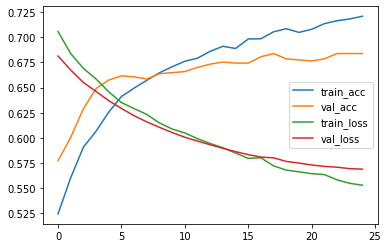


 0.6838777660695469, 0.36889048795769486, 0.6673427991886409, 0.7017543859649122, [[320 136]
 [164 329]] 



In [13]:
# Iterative CROSS VALIDATION
iterations = 10

for i in range(iterations):
    kfold = KFold(10, shuffle=True)

    for train, val in kfold.split(X_train_pt5):

        model = ANN()
        model.compile(optimizer=Adam(learning_rate=1e-5),
                  loss=BinaryCrossentropy(),
                  metrics=['accuracy'])

        X_train_pt, X_val_pt = X_train_pt5[train], X_train_pt5[val]
        y_train_pt, y_val = y_train[train], y_train[val]

        metric = 'val_accuracy'
        checkpointer = ModelCheckpoint(filepath="models/st_model_best.h5",
                                    monitor = metric,
                                    verbose=0, 
                                    save_weights_only=False,
                                    save_best_only=True)

        es = EarlyStopping(monitor='val_accuracy',patience=7,mode='auto')

        # Training and Evaluation
        history = model.fit(X_train_pt, y_train_pt, epochs=100, verbose=1, validation_data = (X_val_pt, y_val), callbacks = [es])

        y_pred = model.predict(X_val_pt).reshape(y_val.shape[0],)
        y_pred = (y_pred > 0.5)
        y_pred = [int(i) for i in y_pred]
        y_val = np.array(y_val)
        y_pred = np.array(y_pred)

        cm = confusion_matrix(y_val, y_pred)
        mcc = matthews_corrcoef(y_val, y_pred)
        acc = accuracy_score(y_val, y_pred)

        sn = cm[1][1]/(cm[1][1]+cm[1][0])
        sp = cm[0][0]/(cm[0][0]+cm[0][1])


        plot(history)
        print("\n %s, %s, %s, %s, %s \n" %(str(acc), str(mcc), str(sn), str(sp), cm))

### From the K-Fold observation, 

In [ ]:
es = EarlyStopping(monitor='accuracy',patience = 5, mode='auto')

model_full = ANN()
model_full.compile(optimizer=Adam(learning_rate=1e-5),
              loss=BinaryCrossentropy(),
              metrics=['accuracy'])


# X_train_p, X_val_p, y_train_1, y_val = train_test_split(X_train_pt5, y_train, test_size = 0.15)

for i in range(20):
    history_full = model_full.fit(X_train_pt5, y_train, epochs=60, verbose=0, callbacks = [es])
    y_pred = model_full.predict(X_test_pt5).reshape(y_test.shape[0],)
    y_pred = (y_pred > 0.5)
    y_pred = [int(i) for i in y_pred]
    y_test = np.array(y_test)
    y_pred = np.array(y_pred)
    cm = confusion_matrix(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    acc = accuracy_score(y_test,y_pred)
    sn = cm[1][1]/(cm[1][1]+cm[1][0])
    sp = cm[0][0]/(cm[0][0]+cm[0][1])
    print("Matthews Correlation : ", mcc)
    print("Confusion Matrix :\n",cm)
    print("Accuracy on test set:   ",acc)
    print("Sensitivity : ", sn)
    print("Specificity: ", sp)
    
    model_full.save('ANN_Models/ANN_' +str(i) + '.h5')